# Question1


Let $\vec{Y} = (Y_1, Y_2, Y_3, Y_4) \sim multinomial(p_1, p_2, p_3, p_4)$ where (WLOG)

$$
Y_1 = 
\begin{cases}
1 \text{ if the student is watching a movie} \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
Y_2 = \begin{cases}
1 \text{ if the student is in COMP-551 class} \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
Y_3 = \begin{cases}
1 \text{ if the student is playing           } \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
Y_4 = \begin{cases}
1 \text{ if the student is studying          } \\ 
0 \text{ otherwise}
\end{cases}
$$

under the constraint $\forall \ i \in \{1, 2, 3, 4\}$ $1 \geq p_i \geq 0$ and $\sum_{i}p_i = 1$
From the random variable $V \sim_ \mathrm{U}(0, 1)$ four random variables:

$$
X_1 = 
\begin{cases}
1 \text{ if } V \in [0, p_1[ \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
X_2 = \begin{cases}
1 \text{ if } V \in [p_1, p_1+p_2[ \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
X_3 = \begin{cases}
1 \text{ if } V \in [p_1+p_2, p_1+p_2+p_3[ \\ 
0 \text{ otherwise}
\end{cases}
$$

$$
X_4 = \begin{cases}
1 \text{ if } V \in [p_1+p_2+p_3, p_1+p_2+p_3+p_4] \\ 
0 \text{ otherwise}
\end{cases}
$$

As a pseudocode, given: 
- Random(a,b) returns any real number $x \in [a, b]$ with equal probability.
- $N \in \mathbb{N}$ := # of samples
- Array indices start from 1
- for $\{p_i\}_{i = 1}^4$ $p_i \in [0, 1]$ $\forall i$ and $\sum_{i} p_i = 1$ 



    define SampleStudent(float $p_1,\ p_2,\ p_3,\ p_4$){
    
        for(int i = 1; i <= N ; i ++) {
        float x = Random(0, 1) # 0 <= x <= 1
        Array activities = Int[4]
        if (x < p_1) {
        
            activties[1]++;
           
        } else if ($p_1$ <= x < $p_1 + p_2$ ) {
        
            activities[2]++;
           
        } else if ($p_1+p_2$ <= x < $p_1+p_2+p_3$ ) {
        
            activities[3]++; 
                
        } else { # $p_1+p_2+p_3 <=  x <= 1$
            
            activities[4]++
        
        } # conditional statement ended
    }
}


In [ ]:
import random
random.seed(329)
def SampleStudent(p1: float, p2: float, p3: float, p4: float, N: int) -> list:
    activities = [0, 0, 0, 0]
    for i in range(0, N):
        x = random.uniform(0, 1)
        if x < p1: #if x1 == 1
            activities[0] += 1
        elif p1 <= x < p1+p2: #if x2 == 1
            activities[1] += 1
        elif p1+p2 <= x < p1+p2+p3: #if x3 == 1
            activities[2] += 1
        else: # logically equivalent to (if p1+p2+p3 <=x) when x4 ==1
            activities[3] += 1
        s = sum(activities)
    for i in range(0, 4):
        activities[i] = activities[i]/s
    return activities
print(SampleStudent(0.2, 0.4, 0.1, 0.3, 100))
print(SampleStudent(0.2, 0.4, 0.1, 0.3, 1000))

# Question 2

We will define MSE as below:
$$
MSE = \frac{1}{N} (Y-\mathbb{X}\widehat{\beta})^T(Y-\mathbb{X}\widehat{\beta})
$$

where:
N is the number of sample points 

Y is the target vector 

$\mathbb{X}$ is our design matrix 


$\beta$ is our linear predictor assuming $\mathbb{E}$[Y|$\mathbb{X}$] = $\mathbb{X}\beta$  

In [294]:

data1 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_1_train.csv'
data2 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_1_valid.csv'
data3 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_1_test.csv'
#import training data
x_train = []
y_train = []
     
with open(data1) as csvfile:
    train = csv.reader(csvfile, delimiter=',')
    for line in train:
        x_train.append(float(line[0]))
        y_train.append(float(line[1]))  
def design_matrix(x_train, degree):
    X = []
    for x in x_train:
        l = [1]
        for i in range(1,degree + 1):
            l.append(x**i)
        X.append(l)
    return X

X = np.asarray(design_matrix(x_train, 20))
y = np.asarray(y_train)
        

We create a matrix
$$X = \begin{pmatrix}
  1 && x_{1} && \cdots & x_{1}^{20}\\
  \vdots &&  \vdots && \ddots & \vdots \\
  1 && x_{n}&& \cdots & x_{n}^{20}
  \end{pmatrix}$$
  
 with the parameter estimates:

$$\hat{\beta} = (X^T X)^{-1}X y$$

We can have the estimate for our output with new $X^{(new)}$, which are our new observed data. Then we have:

$$\hat{y} = X^{(new)} \hat{\beta}$$
$$\hat{y} = X^{(new)} (X^T X)^{-1}X y$$
we now calculate beta

In [299]:
beta = np.linalg.inv(np.transpose(X)@X)@(np.transpose(X)@y)

x_valid = []
y_valid = []
with open(data2) as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_valid.append(float(line[0]))
        y_valid.append(float(line[1]))  
X_valid = np.asarray(design_matrix(x_valid, 20))
y_valid = np.asarray(y_valid)
        
##test data##

x_test = []
y_test = []
with open(data3) as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_test.append(float(line[0]))
        y_test.append(float(line[1]))  
X_test = np.asarray(design_matrix(x_test, 20))
y_test = np.asarray(y_test)
        


(c) It seems to be overfitting as the visual inspection and a jump in MSE suggests.

In [300]:
MSE_train = 1/len(y) * np.transpose(X@beta-y)@(X@beta-y)
MSE_valid = 1/len(y) * np.transpose(X_valid@beta-y_valid)@(X_valid@beta-y_valid)
print("The MSE for training is", MSE_train)
print("The MSE for validation is", MSE_valid)

The MSE for training is 6.47483195569377
The MSE for validation is 1418.7759812110537


We will now visualize the fit.

In [314]:
x_plot = np.linspace(-0.9,0.9,500)
y_plot = np.matmul(design_matrix(x_plot, 20),beta)

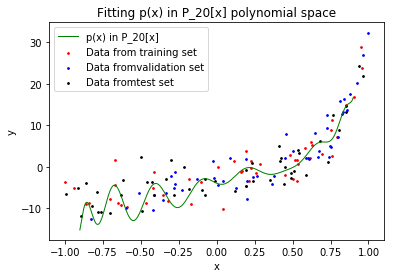

In [316]:
plt.plot(x_plot,y_plot, linewidth=1, color='green', label="p(x) in P_20[x]")
plt.scatter(x_train,y_train, color='red', label="Data from training set", s = 3)
plt.scatter(x_valid,y_valid, color='blue', label="Data fromvalidation set", s = 3)
plt.scatter(x_test,y_test, color='black', label="Data fromtest set", s = 3)

plt.legend(loc='best')


plt.ylabel('y')
plt.xlabel('x')
plt.title('Fitting p(x) in P_20[x] polynomial space')
plt.show()

The best lambda is  0.015


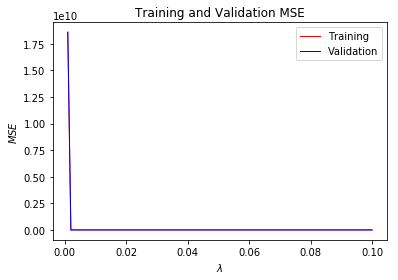

In [321]:
def Ridge(X,y,Lambda):
    lambda_identity= np.zeros((len(X[0]),len(X[0])), float)
    np.fill_diagonal(lambda_identity, Lambda)
    return np.linalg.inv(np.transpose(X)@X+lambda_identity)@(np.transpose(X)@y)

beta_regular = []
lnlambda = []
lambdas = []
MSE_train_regular = []
MSE_valid_regular = []
for i in range(0,100):
    beta_regular.append(Ridge(X,y,i/1000))
    lambda_temp = (i+1)/1000
    H = np.transpose(X@beta_regular[i]-y)@(X@beta_regular[i]-y)
    MSE_train_regular.append(1/len(y) * (H+lambda_temp*(np.transpose(beta_regular[i])@beta_regular[i])))
    H_val =np.transpose(X_valid@beta_regular[i]-y_valid)@(X_valid@beta_regular[i]-y_valid)
    MSE_valid_regular.append(1/len(y) * (H_val+lambda_temp*(np.transpose(beta_regular[i])@beta_regular[i])))
    lambdas.append(lambda_temp)
    
##choosing lambda by different standards    
lambda_index = np.argmin([a_i - b_i for a_i,b_i in zip(MSE_valid_regular,MSE_train_regular)])
lambda_index2 = np.argmin([a_i + b_i for a_i,b_i in zip(MSE_valid_regular,MSE_train_regular)])
lambda_index3 = np.argmin([MSE_valid_regular])
plt.plot(lambdas, MSE_train_regular, linewidth=1, color='red', label="Training")
plt.plot(lambdas, MSE_valid_regular, linewidth=1, color='blue', label="Validation")
plt.legend(loc='best')
#print("The best lambda is ",lambda_index/1000)
print("The best lambda is ",lambda_index3/1000)

best_beta = beta_regular[lambda_index]

plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.title('Training and Validation MSE')

plt.show()    
    
    

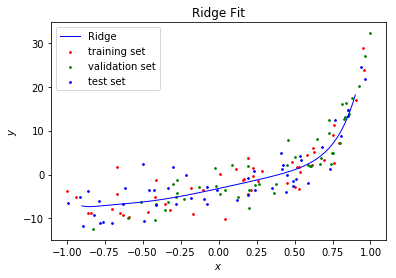

In [322]:
y_plot_regular = design_matrix(x_plot, 20)@best_beta
x_test = []
y_test = []
with open(data3) as csvfile:
    test_data = csv.reader(csvfile, delimiter=',')
    for line in test_data:
        x_test.append(float(line[0]))
        y_test.append(float(line[1]))  
X_test = np.asarray(design_matrix(x_test, 20))
y_test = np.asarray(y_test)


H = np.transpose(X_test@beta_regular[lambda_index]-y_test)@(X_test@beta_regular[lambda_index]-y_test)
plt.plot(x_plot,y_plot_regular, linewidth=1, color='blue', label="Ridge")
plt.scatter(x_train,y_train, color='red', label="training set", s = 3)
plt.scatter(x_valid,y_valid, color='green', label="validation set", s = 3)
plt.scatter(x_test,y_test, color='blue', label="test set", s = 3)
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('Ridge Fit')
plt.legend(loc='best')

plt.show()

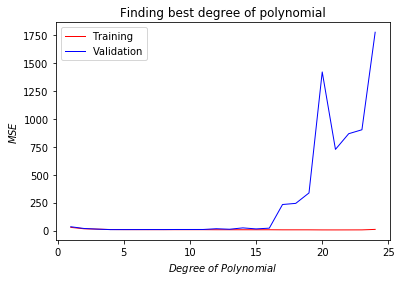

In [327]:
MSE_train_array = []
MSE_valid_array = []
for i in range(1,25):
    X = np.asarray(design_matrix(x_train, i))
    x_valid = []
    y_valid = []
    with open(data2) as csvfile:
        valid_data = csv.reader(csvfile, delimiter=',')
        for line in valid_data:
            x_valid.append(float(line[0]))
            y_valid.append(float(line[1]))  
    X_valid = np.asarray(design_matrix(x_valid, i))
    y_valid = np.asarray(y_valid)
    beta = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y
    
    MSE_train_array.append(1/len(y) * np.transpose(X@beta-y)@(X@beta-y))
    MSE_valid_array.append(1/len(y) * np.transpose(X_valid@beta-y_valid)@(X_valid@beta-y_valid))

x_plot = [i for i in range(1,25)]    
    
plt.plot(x_plot,MSE_train_array, linewidth=1, color='red', label="Training")
plt.plot(x_plot,MSE_valid_array, linewidth=1, color='blue', label="Validation")

plt.ylabel('$MSE$')
plt.xlabel('$Degree\ of\ Polynomial$')
plt.title('Finding best degree of polynomial')

plt.legend(loc='best')
plt.show()


We can see from above that degree 20 has significantly higher validation error than training error which indiciates that the degree 20 model is exhibiting overfitting

(3) It seems that the source polynomial is at most 16 degree since that is the degree with the highest degree polynomial you can fit without overfitting.

# Question 3


1. Fit a linear regression model to this dataset by using stochastic gradient descent (one example at a time).

(a) Use the step size of 1e-6. Compute the MSE on validation set for every epoch.

The number of epochs are 0
The number of epochs are 1
The number of epochs are 2
The number of epochs are 3
The number of epochs are 4
The number of epochs are 5
The number of epochs are 6
The number of epochs are 7
The number of epochs are 8
The number of epochs are 9
The number of epochs are 10
The number of epochs are 11
The number of epochs are 12
The number of epochs are 13
The number of epochs are 14
The number of epochs are 15
The number of epochs are 16
The number of epochs are 17
The number of epochs are 18
The number of epochs are 19
The number of epochs are 20
The number of epochs are 21
The number of epochs are 22
The number of epochs are 23
The number of epochs are 24
The number of epochs are 25
The number of epochs are 26
The number of epochs are 27
The number of epochs are 28
The number of epochs are 29
The number of epochs are 30
The number of epochs are 31
The number of epochs are 32
The number of epochs are 33
The number of epochs are 34
The number of epochs are 35
Th

The number of epochs are 384
The number of epochs are 385
The number of epochs are 386
The number of epochs are 387
The number of epochs are 388
The number of epochs are 389
The number of epochs are 390
The number of epochs are 391
The number of epochs are 392
The number of epochs are 393
The number of epochs are 394
The number of epochs are 395
The number of epochs are 396
The number of epochs are 397
The number of epochs are 398
The number of epochs are 399
The number of epochs are 400
The number of epochs are 401
The number of epochs are 402
The number of epochs are 403
The number of epochs are 404
The number of epochs are 405
The number of epochs are 406
The number of epochs are 407
The number of epochs are 408
The number of epochs are 409
The number of epochs are 410
The number of epochs are 411
The number of epochs are 412
The number of epochs are 413
The number of epochs are 414
The number of epochs are 415
The number of epochs are 416
The number of epochs are 417
The number of 

The number of epochs are 666
The number of epochs are 667
The number of epochs are 668
The number of epochs are 669
The number of epochs are 670
The number of epochs are 671
The number of epochs are 672
The number of epochs are 673
The number of epochs are 674
The number of epochs are 675
The number of epochs are 676
The number of epochs are 677
The number of epochs are 678
The number of epochs are 679
The number of epochs are 680
The number of epochs are 681
The number of epochs are 682
The number of epochs are 683
The number of epochs are 684
The number of epochs are 685
The number of epochs are 686
The number of epochs are 687
The number of epochs are 688
The number of epochs are 689
The number of epochs are 690
The number of epochs are 691
The number of epochs are 692
The number of epochs are 693
The number of epochs are 694
The number of epochs are 695
The number of epochs are 696
The number of epochs are 697
The number of epochs are 698
The number of epochs are 699
The number of 

The number of epochs are 1066
The number of epochs are 1067
The number of epochs are 1068
The number of epochs are 1069
The number of epochs are 1070
The number of epochs are 1071
The number of epochs are 1072
The number of epochs are 1073
The number of epochs are 1074
The number of epochs are 1075
The number of epochs are 1076
The number of epochs are 1077
The number of epochs are 1078
The number of epochs are 1079
The number of epochs are 1080
The number of epochs are 1081
The number of epochs are 1082
The number of epochs are 1083
The number of epochs are 1084
The number of epochs are 1085
The number of epochs are 1086
The number of epochs are 1087
The number of epochs are 1088
The number of epochs are 1089
The number of epochs are 1090
The number of epochs are 1091
The number of epochs are 1092
The number of epochs are 1093
The number of epochs are 1094
The number of epochs are 1095
The number of epochs are 1096
The number of epochs are 1097
The number of epochs are 1098
The number

The number of epochs are 1595
The number of epochs are 1596
The number of epochs are 1597
The number of epochs are 1598
The number of epochs are 1599
The number of epochs are 1600
The number of epochs are 1601
The number of epochs are 1602
The number of epochs are 1603
The number of epochs are 1604
The number of epochs are 1605
The number of epochs are 1606
The number of epochs are 1607
The number of epochs are 1608
The number of epochs are 1609
The number of epochs are 1610
The number of epochs are 1611
The number of epochs are 1612
The number of epochs are 1613
The number of epochs are 1614
The number of epochs are 1615
The number of epochs are 1616
The number of epochs are 1617
The number of epochs are 1618
The number of epochs are 1619
The number of epochs are 1620
The number of epochs are 1621
The number of epochs are 1622
The number of epochs are 1623
The number of epochs are 1624
The number of epochs are 1625
The number of epochs are 1626
The number of epochs are 1627
The number

The number of epochs are 1876
The number of epochs are 1877
The number of epochs are 1878
The number of epochs are 1879
The number of epochs are 1880
The number of epochs are 1881
The number of epochs are 1882
The number of epochs are 1883
The number of epochs are 1884
The number of epochs are 1885
The number of epochs are 1886
The number of epochs are 1887
The number of epochs are 1888
The number of epochs are 1889
The number of epochs are 1890
The number of epochs are 1891
The number of epochs are 1892
The number of epochs are 1893
The number of epochs are 1894
The number of epochs are 1895
The number of epochs are 1896
The number of epochs are 1897
The number of epochs are 1898
The number of epochs are 1899
The number of epochs are 1900
The number of epochs are 1901
The number of epochs are 1902
The number of epochs are 1903
The number of epochs are 1904
The number of epochs are 1905
The number of epochs are 1906
The number of epochs are 1907
The number of epochs are 1908
The number

The number of epochs are 2195
The number of epochs are 2196
The number of epochs are 2197
The number of epochs are 2198
The number of epochs are 2199
The number of epochs are 2200
The number of epochs are 2201
The number of epochs are 2202
The number of epochs are 2203
The number of epochs are 2204
The number of epochs are 2205
The number of epochs are 2206
The number of epochs are 2207
The number of epochs are 2208
The number of epochs are 2209
The number of epochs are 2210
The number of epochs are 2211
The number of epochs are 2212
The number of epochs are 2213
The number of epochs are 2214
The number of epochs are 2215
The number of epochs are 2216
The number of epochs are 2217
The number of epochs are 2218
The number of epochs are 2219
The number of epochs are 2220
The number of epochs are 2221
The number of epochs are 2222
The number of epochs are 2223
The number of epochs are 2224
The number of epochs are 2225
The number of epochs are 2226
The number of epochs are 2227
The number

The number of epochs are 2572
The number of epochs are 2573
The number of epochs are 2574
The number of epochs are 2575
The number of epochs are 2576
The number of epochs are 2577
The number of epochs are 2578
The number of epochs are 2579
The number of epochs are 2580
The number of epochs are 2581
The number of epochs are 2582
The number of epochs are 2583
The number of epochs are 2584
The number of epochs are 2585
The number of epochs are 2586
The number of epochs are 2587
The number of epochs are 2588
The number of epochs are 2589
The number of epochs are 2590
The number of epochs are 2591
The number of epochs are 2592
The number of epochs are 2593
The number of epochs are 2594
The number of epochs are 2595
The number of epochs are 2596
The number of epochs are 2597
The number of epochs are 2598
The number of epochs are 2599
The number of epochs are 2600
The number of epochs are 2601
The number of epochs are 2602
The number of epochs are 2603
The number of epochs are 2604
The number

The number of epochs are 3095
The number of epochs are 3096
The number of epochs are 3097
The number of epochs are 3098
The number of epochs are 3099
The number of epochs are 3100
The number of epochs are 3101
The number of epochs are 3102
The number of epochs are 3103
The number of epochs are 3104
The number of epochs are 3105
The number of epochs are 3106
The number of epochs are 3107
The number of epochs are 3108
The number of epochs are 3109
The number of epochs are 3110
The number of epochs are 3111
The number of epochs are 3112
The number of epochs are 3113
The number of epochs are 3114
The number of epochs are 3115
The number of epochs are 3116
The number of epochs are 3117
The number of epochs are 3118
The number of epochs are 3119
The number of epochs are 3120
The number of epochs are 3121
The number of epochs are 3122
The number of epochs are 3123
The number of epochs are 3124
The number of epochs are 3125
The number of epochs are 3126
The number of epochs are 3127
The number

The number of epochs are 3382
The number of epochs are 3383
The number of epochs are 3384
The number of epochs are 3385
The number of epochs are 3386
The number of epochs are 3387
The number of epochs are 3388
The number of epochs are 3389
The number of epochs are 3390
The number of epochs are 3391
The number of epochs are 3392
The number of epochs are 3393
The number of epochs are 3394
The number of epochs are 3395
The number of epochs are 3396
The number of epochs are 3397
The number of epochs are 3398
The number of epochs are 3399
The number of epochs are 3400
The number of epochs are 3401
The number of epochs are 3402
The number of epochs are 3403
The number of epochs are 3404
The number of epochs are 3405
The number of epochs are 3406
The number of epochs are 3407
The number of epochs are 3408
The number of epochs are 3409
The number of epochs are 3410
The number of epochs are 3411
The number of epochs are 3412
The number of epochs are 3413
The number of epochs are 3414
The number

The number of epochs are 3660
The number of epochs are 3661
The number of epochs are 3662
The number of epochs are 3663
The number of epochs are 3664
The number of epochs are 3665
The number of epochs are 3666
The number of epochs are 3667
The number of epochs are 3668
The number of epochs are 3669
The number of epochs are 3670
The number of epochs are 3671
The number of epochs are 3672
The number of epochs are 3673
The number of epochs are 3674
The number of epochs are 3675
The number of epochs are 3676
The number of epochs are 3677
The number of epochs are 3678
The number of epochs are 3679
The number of epochs are 3680
The number of epochs are 3681
The number of epochs are 3682
The number of epochs are 3683
The number of epochs are 3684
The number of epochs are 3685
The number of epochs are 3686
The number of epochs are 3687
The number of epochs are 3688
The number of epochs are 3689
The number of epochs are 3690
The number of epochs are 3691
The number of epochs are 3692
The number

The number of epochs are 4067
The number of epochs are 4068
The number of epochs are 4069
The number of epochs are 4070
The number of epochs are 4071
The number of epochs are 4072
The number of epochs are 4073
The number of epochs are 4074
The number of epochs are 4075
The number of epochs are 4076
The number of epochs are 4077
The number of epochs are 4078
The number of epochs are 4079
The number of epochs are 4080
The number of epochs are 4081
The number of epochs are 4082
The number of epochs are 4083
The number of epochs are 4084
The number of epochs are 4085
The number of epochs are 4086
The number of epochs are 4087
The number of epochs are 4088
The number of epochs are 4089
The number of epochs are 4090
The number of epochs are 4091
The number of epochs are 4092
The number of epochs are 4093
The number of epochs are 4094
The number of epochs are 4095
The number of epochs are 4096
The number of epochs are 4097
The number of epochs are 4098
The number of epochs are 4099
The number

The number of epochs are 4599
The number of epochs are 4600
The number of epochs are 4601
The number of epochs are 4602
The number of epochs are 4603
The number of epochs are 4604
The number of epochs are 4605
The number of epochs are 4606
The number of epochs are 4607
The number of epochs are 4608
The number of epochs are 4609
The number of epochs are 4610
The number of epochs are 4611
The number of epochs are 4612
The number of epochs are 4613
The number of epochs are 4614
The number of epochs are 4615
The number of epochs are 4616
The number of epochs are 4617
The number of epochs are 4618
The number of epochs are 4619
The number of epochs are 4620
The number of epochs are 4621
The number of epochs are 4622
The number of epochs are 4623
The number of epochs are 4624
The number of epochs are 4625
The number of epochs are 4626
The number of epochs are 4627
The number of epochs are 4628
The number of epochs are 4629
The number of epochs are 4630
The number of epochs are 4631
The number

The number of epochs are 4886
The number of epochs are 4887
The number of epochs are 4888
The number of epochs are 4889
The number of epochs are 4890
The number of epochs are 4891
The number of epochs are 4892
The number of epochs are 4893
The number of epochs are 4894
The number of epochs are 4895
The number of epochs are 4896
The number of epochs are 4897
The number of epochs are 4898
The number of epochs are 4899
The number of epochs are 4900
The number of epochs are 4901
The number of epochs are 4902
The number of epochs are 4903
The number of epochs are 4904
The number of epochs are 4905
The number of epochs are 4906
The number of epochs are 4907
The number of epochs are 4908
The number of epochs are 4909
The number of epochs are 4910
The number of epochs are 4911
The number of epochs are 4912
The number of epochs are 4913
The number of epochs are 4914
The number of epochs are 4915
The number of epochs are 4916
The number of epochs are 4917
The number of epochs are 4918
The number

The number of epochs are 5202
The number of epochs are 5203
The number of epochs are 5204
The number of epochs are 5205
The number of epochs are 5206
The number of epochs are 5207
The number of epochs are 5208
The number of epochs are 5209
The number of epochs are 5210
The number of epochs are 5211
The number of epochs are 5212
The number of epochs are 5213
The number of epochs are 5214
The number of epochs are 5215
The number of epochs are 5216
The number of epochs are 5217
The number of epochs are 5218
The number of epochs are 5219
The number of epochs are 5220
The number of epochs are 5221
The number of epochs are 5222
The number of epochs are 5223
The number of epochs are 5224
The number of epochs are 5225
The number of epochs are 5226
The number of epochs are 5227
The number of epochs are 5228
The number of epochs are 5229
The number of epochs are 5230
The number of epochs are 5231
The number of epochs are 5232
The number of epochs are 5233
The number of epochs are 5234
The number

The number of epochs are 5572
The number of epochs are 5573
The number of epochs are 5574
The number of epochs are 5575
The number of epochs are 5576
The number of epochs are 5577
The number of epochs are 5578
The number of epochs are 5579
The number of epochs are 5580
The number of epochs are 5581
The number of epochs are 5582
The number of epochs are 5583
The number of epochs are 5584
The number of epochs are 5585
The number of epochs are 5586
The number of epochs are 5587
The number of epochs are 5588
The number of epochs are 5589
The number of epochs are 5590
The number of epochs are 5591
The number of epochs are 5592
The number of epochs are 5593
The number of epochs are 5594
The number of epochs are 5595
The number of epochs are 5596
The number of epochs are 5597
The number of epochs are 5598
The number of epochs are 5599
The number of epochs are 5600
The number of epochs are 5601
The number of epochs are 5602
The number of epochs are 5603
The number of epochs are 5604
The number

The number of epochs are 6114
The number of epochs are 6115
The number of epochs are 6116
The number of epochs are 6117
The number of epochs are 6118
The number of epochs are 6119
The number of epochs are 6120
The number of epochs are 6121
The number of epochs are 6122
The number of epochs are 6123
The number of epochs are 6124
The number of epochs are 6125
The number of epochs are 6126
The number of epochs are 6127
The number of epochs are 6128
The number of epochs are 6129
The number of epochs are 6130
The number of epochs are 6131
The number of epochs are 6132
The number of epochs are 6133
The number of epochs are 6134
The number of epochs are 6135
The number of epochs are 6136
The number of epochs are 6137
The number of epochs are 6138
The number of epochs are 6139
The number of epochs are 6140
The number of epochs are 6141
The number of epochs are 6142
The number of epochs are 6143
The number of epochs are 6144
The number of epochs are 6145
The number of epochs are 6146
The number

The number of epochs are 6406
The number of epochs are 6407
The number of epochs are 6408
The number of epochs are 6409
The number of epochs are 6410
The number of epochs are 6411
The number of epochs are 6412
The number of epochs are 6413
The number of epochs are 6414
The number of epochs are 6415
The number of epochs are 6416
The number of epochs are 6417
The number of epochs are 6418
The number of epochs are 6419
The number of epochs are 6420
The number of epochs are 6421
The number of epochs are 6422
The number of epochs are 6423
The number of epochs are 6424
The number of epochs are 6425
The number of epochs are 6426
The number of epochs are 6427
The number of epochs are 6428
The number of epochs are 6429
The number of epochs are 6430
The number of epochs are 6431
The number of epochs are 6432
The number of epochs are 6433
The number of epochs are 6434
The number of epochs are 6435
The number of epochs are 6436
The number of epochs are 6437
The number of epochs are 6438
The number

The number of epochs are 6740
The number of epochs are 6741
The number of epochs are 6742
The number of epochs are 6743
The number of epochs are 6744
The number of epochs are 6745
The number of epochs are 6746
The number of epochs are 6747
The number of epochs are 6748
The number of epochs are 6749
The number of epochs are 6750
The number of epochs are 6751
The number of epochs are 6752
The number of epochs are 6753
The number of epochs are 6754
The number of epochs are 6755
The number of epochs are 6756
The number of epochs are 6757
The number of epochs are 6758
The number of epochs are 6759
The number of epochs are 6760
The number of epochs are 6761
The number of epochs are 6762
The number of epochs are 6763
The number of epochs are 6764
The number of epochs are 6765
The number of epochs are 6766
The number of epochs are 6767
The number of epochs are 6768
The number of epochs are 6769
The number of epochs are 6770
The number of epochs are 6771
The number of epochs are 6772
The number

The number of epochs are 7110
The number of epochs are 7111
The number of epochs are 7112
The number of epochs are 7113
The number of epochs are 7114
The number of epochs are 7115
The number of epochs are 7116
The number of epochs are 7117
The number of epochs are 7118
The number of epochs are 7119
The number of epochs are 7120
The number of epochs are 7121
The number of epochs are 7122
The number of epochs are 7123
The number of epochs are 7124
The number of epochs are 7125
The number of epochs are 7126
The number of epochs are 7127
The number of epochs are 7128
The number of epochs are 7129
The number of epochs are 7130
The number of epochs are 7131
The number of epochs are 7132
The number of epochs are 7133
The number of epochs are 7134
The number of epochs are 7135
The number of epochs are 7136
The number of epochs are 7137
The number of epochs are 7138
The number of epochs are 7139
The number of epochs are 7140
The number of epochs are 7141
The number of epochs are 7142
The number

The number of epochs are 7574
The number of epochs are 7575
The number of epochs are 7576
The number of epochs are 7577
The number of epochs are 7578
The number of epochs are 7579
The number of epochs are 7580
The number of epochs are 7581
The number of epochs are 7582
The number of epochs are 7583
The number of epochs are 7584
The number of epochs are 7585
The number of epochs are 7586
The number of epochs are 7587
The number of epochs are 7588
The number of epochs are 7589
The number of epochs are 7590
The number of epochs are 7591
The number of epochs are 7592
The number of epochs are 7593
The number of epochs are 7594
The number of epochs are 7595
The number of epochs are 7596
The number of epochs are 7597
The number of epochs are 7598
The number of epochs are 7599
The number of epochs are 7600
The number of epochs are 7601
The number of epochs are 7602
The number of epochs are 7603
The number of epochs are 7604
The number of epochs are 7605
The number of epochs are 7606
The number

The number of epochs are 8133
The number of epochs are 8134
The number of epochs are 8135
The number of epochs are 8136
The number of epochs are 8137
The number of epochs are 8138
The number of epochs are 8139
The number of epochs are 8140
The number of epochs are 8141
The number of epochs are 8142
The number of epochs are 8143
The number of epochs are 8144
The number of epochs are 8145
The number of epochs are 8146
The number of epochs are 8147
The number of epochs are 8148
The number of epochs are 8149
The number of epochs are 8150
The number of epochs are 8151
The number of epochs are 8152
The number of epochs are 8153
The number of epochs are 8154
The number of epochs are 8155
The number of epochs are 8156
The number of epochs are 8157
The number of epochs are 8158
The number of epochs are 8159
The number of epochs are 8160
The number of epochs are 8161
The number of epochs are 8162
The number of epochs are 8163
The number of epochs are 8164
The number of epochs are 8165
The number

The number of epochs are 8445
The number of epochs are 8446
The number of epochs are 8447
The number of epochs are 8448
The number of epochs are 8449
The number of epochs are 8450
The number of epochs are 8451
The number of epochs are 8452
The number of epochs are 8453
The number of epochs are 8454
The number of epochs are 8455
The number of epochs are 8456
The number of epochs are 8457
The number of epochs are 8458
The number of epochs are 8459
The number of epochs are 8460
The number of epochs are 8461
The number of epochs are 8462
The number of epochs are 8463
The number of epochs are 8464
The number of epochs are 8465
The number of epochs are 8466
The number of epochs are 8467
The number of epochs are 8468
The number of epochs are 8469
The number of epochs are 8470
The number of epochs are 8471
The number of epochs are 8472
The number of epochs are 8473
The number of epochs are 8474
The number of epochs are 8475
The number of epochs are 8476
The number of epochs are 8477
The number

The number of epochs are 8816
The number of epochs are 8817
The number of epochs are 8818
The number of epochs are 8819
The number of epochs are 8820
The number of epochs are 8821
The number of epochs are 8822
The number of epochs are 8823
The number of epochs are 8824
The number of epochs are 8825
The number of epochs are 8826
The number of epochs are 8827
The number of epochs are 8828
The number of epochs are 8829
The number of epochs are 8830
The number of epochs are 8831
The number of epochs are 8832
The number of epochs are 8833
The number of epochs are 8834
The number of epochs are 8835
The number of epochs are 8836
The number of epochs are 8837
The number of epochs are 8838
The number of epochs are 8839
The number of epochs are 8840
The number of epochs are 8841
The number of epochs are 8842
The number of epochs are 8843
The number of epochs are 8844
The number of epochs are 8845
The number of epochs are 8846
The number of epochs are 8847
The number of epochs are 8848
The number

The number of epochs are 9353
The number of epochs are 9354
The number of epochs are 9355
The number of epochs are 9356
The number of epochs are 9357
The number of epochs are 9358
The number of epochs are 9359
The number of epochs are 9360
The number of epochs are 9361
The number of epochs are 9362
The number of epochs are 9363
The number of epochs are 9364
The number of epochs are 9365
The number of epochs are 9366
The number of epochs are 9367
The number of epochs are 9368
The number of epochs are 9369
The number of epochs are 9370
The number of epochs are 9371
The number of epochs are 9372
The number of epochs are 9373
The number of epochs are 9374
The number of epochs are 9375
The number of epochs are 9376
The number of epochs are 9377
The number of epochs are 9378
The number of epochs are 9379
The number of epochs are 9380
The number of epochs are 9381
The number of epochs are 9382
The number of epochs are 9383
The number of epochs are 9384
The number of epochs are 9385
The number

The number of epochs are 9649
The number of epochs are 9650
The number of epochs are 9651
The number of epochs are 9652
The number of epochs are 9653
The number of epochs are 9654
The number of epochs are 9655
The number of epochs are 9656
The number of epochs are 9657
The number of epochs are 9658
The number of epochs are 9659
The number of epochs are 9660
The number of epochs are 9661
The number of epochs are 9662
The number of epochs are 9663
The number of epochs are 9664
The number of epochs are 9665
The number of epochs are 9666
The number of epochs are 9667
The number of epochs are 9668
The number of epochs are 9669
The number of epochs are 9670
The number of epochs are 9671
The number of epochs are 9672
The number of epochs are 9673
The number of epochs are 9674
The number of epochs are 9675
The number of epochs are 9676
The number of epochs are 9677
The number of epochs are 9678
The number of epochs are 9679
The number of epochs are 9680
The number of epochs are 9681
The number

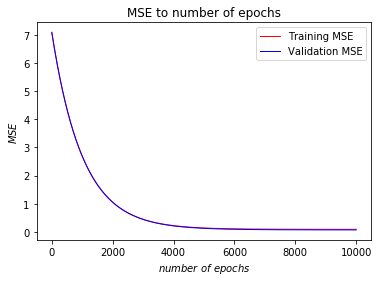

In [330]:
x2_train = []
y2_train = []
x2_valid = []
y2_valid = []
x2_test = []
y2_test = []
set1 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_2_train.csv'
set2 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_2_valid.csv'
set3 = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/Dataset_2_test.csv'

with open(set1) as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_train.append(float(line[0]))
        y2_train.append(float(line[1]))

with open(set2) as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_valid.append(float(line[0]))
        y2_valid.append(float(line[1]))

with open(set3) as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_test.append(float(line[0]))
        y2_test.append(float(line[1]))        
max_epoch = 10000        
def SGD(step_size, max_epoch):        

    params = [2,3]


    MSE_train_array = []
    MSE_valid_array = []
    epoch = 0

    while epoch < max_epoch:
        training_error = 0
        validation_error = 0

        for x,y in zip(x2_train,y2_train):
            estimate_y = [params[0] + params[1]*i for i in x2_train]

            params[0] = params[0] - (step_size*(params[0] + params[1]*x  - y))
            params[1] = params[1] - (step_size*(params[0] + params[1]*x - y) *x)

        for x,y in zip(x2_train,y2_train):
            training_error += (y - (params[0] + params[1]*x ))**2
        training_error = training_error/len(y2_train)

        for x,y in zip(x2_valid,y2_valid):
            validation_error += (y - (params[0] + params[1]*x ))**2
        validation_error = validation_error/len(y2_valid)

        MSE_train_array.append(training_error)
        MSE_valid_array.append(validation_error)
        print("The number of epochs are", epoch)
        epoch = epoch + 1
    
    return MSE_train_array, MSE_valid_array ,params
MSE_train_array, MSE_valid_array, params = SGD(0.000001, max_epoch)

plt.plot([i for i in range(1,max_epoch + 1)],MSE_train_array, linewidth=1, color='red', label="Training")
plt.plot([i for i in range(1,max_epoch + 1)],MSE_valid_array, linewidth=1, color='blue', label="Validation")
plt.legend(loc='best')    

plt.ylabel('$MSE$')
plt.xlabel('$number\ of\ epochs$')
plt.title('MSE to number of epochs')
plt.legend(['Training MSE','Validation MSE'])
plt.show()

(b) Plot the learning curve i.e. training and validation MSE for every epoch. [Note: Plot the learning curve until the learning saturates.]

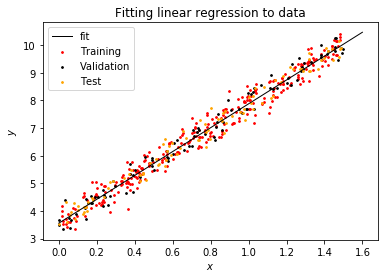

In [337]:
plt.scatter(x2_train, y2_train, color='red', label="Training", s=3)
plt.scatter(x2_valid, y2_valid, color='black', label="Validation", s=3)
plt.scatter(x2_test, y2_test, color='orange', label="Test", s=3)

plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='black'
         , linewidth=1, label="fit" )
plt.legend(loc='best')    



plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('Fitting linear regression to data')


plt.show()

2. Try different step sizes and choose the best step size by using validation data.

In [ ]:
MSE_valid_array_final = []
for i in range(1,6):
    MSE_train_array, MSE_valid_array, params = SGD((3**i)*0.000001, max_epoch)
    MSE_valid_array_final.append(MSE_valid_array[len(MSE_valid_array) - 1])
    print("The final validation MSE for step stepsize of " + repr((3**i)*0.000001)+ " is " + repr(MSE_valid_array_final[i -1]) )
    
print("The best step size out of the candidates according to validation MSE is ", (3**(np.argmin(MSE_valid_array_final) + 1))*0.000001 )



test_error = 0
for x,y in zip(x2_valid,y2_valid):
    test_error += (y - (params[0] + params[1]*x ))**2



The number of epochs are 0
The number of epochs are 1
The number of epochs are 2
The number of epochs are 3
The number of epochs are 4
The number of epochs are 5
The number of epochs are 6
The number of epochs are 7
The number of epochs are 8
The number of epochs are 9
The number of epochs are 10
The number of epochs are 11
The number of epochs are 12
The number of epochs are 13
The number of epochs are 14
The number of epochs are 15
The number of epochs are 16
The number of epochs are 17
The number of epochs are 18
The number of epochs are 19
The number of epochs are 20
The number of epochs are 21
The number of epochs are 22
The number of epochs are 23
The number of epochs are 24
The number of epochs are 25
The number of epochs are 26
The number of epochs are 27
The number of epochs are 28
The number of epochs are 29
The number of epochs are 30
The number of epochs are 31
The number of epochs are 32
The number of epochs are 33
The number of epochs are 34
The number of epochs are 35
Th

The number of epochs are 304
The number of epochs are 305
The number of epochs are 306
The number of epochs are 307
The number of epochs are 308
The number of epochs are 309
The number of epochs are 310
The number of epochs are 311
The number of epochs are 312
The number of epochs are 313
The number of epochs are 314
The number of epochs are 315
The number of epochs are 316
The number of epochs are 317
The number of epochs are 318
The number of epochs are 319
The number of epochs are 320
The number of epochs are 321
The number of epochs are 322
The number of epochs are 323
The number of epochs are 324
The number of epochs are 325
The number of epochs are 326
The number of epochs are 327
The number of epochs are 328
The number of epochs are 329
The number of epochs are 330
The number of epochs are 331
The number of epochs are 332
The number of epochs are 333
The number of epochs are 334
The number of epochs are 335
The number of epochs are 336
The number of epochs are 337
The number of 

The number of epochs are 791
The number of epochs are 792
The number of epochs are 793
The number of epochs are 794
The number of epochs are 795
The number of epochs are 796
The number of epochs are 797
The number of epochs are 798
The number of epochs are 799
The number of epochs are 800
The number of epochs are 801
The number of epochs are 802
The number of epochs are 803
The number of epochs are 804
The number of epochs are 805
The number of epochs are 806
The number of epochs are 807
The number of epochs are 808
The number of epochs are 809
The number of epochs are 810
The number of epochs are 811
The number of epochs are 812
The number of epochs are 813
The number of epochs are 814
The number of epochs are 815
The number of epochs are 816
The number of epochs are 817
The number of epochs are 818
The number of epochs are 819
The number of epochs are 820
The number of epochs are 821
The number of epochs are 822
The number of epochs are 823
The number of epochs are 824
The number of 

The number of epochs are 1367
The number of epochs are 1368
The number of epochs are 1369
The number of epochs are 1370
The number of epochs are 1371
The number of epochs are 1372
The number of epochs are 1373
The number of epochs are 1374
The number of epochs are 1375
The number of epochs are 1376
The number of epochs are 1377
The number of epochs are 1378
The number of epochs are 1379
The number of epochs are 1380
The number of epochs are 1381
The number of epochs are 1382
The number of epochs are 1383
The number of epochs are 1384
The number of epochs are 1385
The number of epochs are 1386
The number of epochs are 1387
The number of epochs are 1388
The number of epochs are 1389
The number of epochs are 1390
The number of epochs are 1391
The number of epochs are 1392
The number of epochs are 1393
The number of epochs are 1394
The number of epochs are 1395
The number of epochs are 1396
The number of epochs are 1397
The number of epochs are 1398
The number of epochs are 1399
The number

The number of epochs are 1773
The number of epochs are 1774
The number of epochs are 1775
The number of epochs are 1776
The number of epochs are 1777
The number of epochs are 1778
The number of epochs are 1779
The number of epochs are 1780
The number of epochs are 1781
The number of epochs are 1782
The number of epochs are 1783
The number of epochs are 1784
The number of epochs are 1785
The number of epochs are 1786
The number of epochs are 1787
The number of epochs are 1788
The number of epochs are 1789
The number of epochs are 1790
The number of epochs are 1791
The number of epochs are 1792
The number of epochs are 1793
The number of epochs are 1794
The number of epochs are 1795
The number of epochs are 1796
The number of epochs are 1797
The number of epochs are 1798
The number of epochs are 1799
The number of epochs are 1800
The number of epochs are 1801
The number of epochs are 1802
The number of epochs are 1803
The number of epochs are 1804
The number of epochs are 1805
The number

The number of epochs are 2316
The number of epochs are 2317
The number of epochs are 2318
The number of epochs are 2319
The number of epochs are 2320
The number of epochs are 2321
The number of epochs are 2322
The number of epochs are 2323
The number of epochs are 2324
The number of epochs are 2325
The number of epochs are 2326
The number of epochs are 2327
The number of epochs are 2328
The number of epochs are 2329
The number of epochs are 2330
The number of epochs are 2331
The number of epochs are 2332
The number of epochs are 2333
The number of epochs are 2334
The number of epochs are 2335
The number of epochs are 2336
The number of epochs are 2337
The number of epochs are 2338
The number of epochs are 2339
The number of epochs are 2340
The number of epochs are 2341
The number of epochs are 2342
The number of epochs are 2343
The number of epochs are 2344
The number of epochs are 2345
The number of epochs are 2346
The number of epochs are 2347
The number of epochs are 2348
The number

The number of epochs are 2880
The number of epochs are 2881
The number of epochs are 2882
The number of epochs are 2883
The number of epochs are 2884
The number of epochs are 2885
The number of epochs are 2886
The number of epochs are 2887
The number of epochs are 2888
The number of epochs are 2889
The number of epochs are 2890
The number of epochs are 2891
The number of epochs are 2892
The number of epochs are 2893
The number of epochs are 2894
The number of epochs are 2895
The number of epochs are 2896
The number of epochs are 2897
The number of epochs are 2898
The number of epochs are 2899
The number of epochs are 2900
The number of epochs are 2901
The number of epochs are 2902
The number of epochs are 2903
The number of epochs are 2904
The number of epochs are 2905
The number of epochs are 2906
The number of epochs are 2907
The number of epochs are 2908
The number of epochs are 2909
The number of epochs are 2910
The number of epochs are 2911
The number of epochs are 2912
The number

The number of epochs are 3402
The number of epochs are 3403
The number of epochs are 3404
The number of epochs are 3405
The number of epochs are 3406
The number of epochs are 3407
The number of epochs are 3408
The number of epochs are 3409
The number of epochs are 3410
The number of epochs are 3411
The number of epochs are 3412
The number of epochs are 3413
The number of epochs are 3414
The number of epochs are 3415
The number of epochs are 3416
The number of epochs are 3417
The number of epochs are 3418
The number of epochs are 3419
The number of epochs are 3420
The number of epochs are 3421
The number of epochs are 3422
The number of epochs are 3423
The number of epochs are 3424
The number of epochs are 3425
The number of epochs are 3426
The number of epochs are 3427
The number of epochs are 3428
The number of epochs are 3429
The number of epochs are 3430
The number of epochs are 3431
The number of epochs are 3432
The number of epochs are 3433
The number of epochs are 3434
The number

The number of epochs are 3768
The number of epochs are 3769
The number of epochs are 3770
The number of epochs are 3771
The number of epochs are 3772
The number of epochs are 3773
The number of epochs are 3774
The number of epochs are 3775
The number of epochs are 3776
The number of epochs are 3777
The number of epochs are 3778
The number of epochs are 3779
The number of epochs are 3780
The number of epochs are 3781
The number of epochs are 3782
The number of epochs are 3783
The number of epochs are 3784
The number of epochs are 3785
The number of epochs are 3786
The number of epochs are 3787
The number of epochs are 3788
The number of epochs are 3789
The number of epochs are 3790
The number of epochs are 3791
The number of epochs are 3792
The number of epochs are 3793
The number of epochs are 3794
The number of epochs are 3795
The number of epochs are 3796
The number of epochs are 3797
The number of epochs are 3798
The number of epochs are 3799
The number of epochs are 3800
The number

The number of epochs are 4297
The number of epochs are 4298
The number of epochs are 4299
The number of epochs are 4300
The number of epochs are 4301
The number of epochs are 4302
The number of epochs are 4303
The number of epochs are 4304
The number of epochs are 4305
The number of epochs are 4306
The number of epochs are 4307
The number of epochs are 4308
The number of epochs are 4309
The number of epochs are 4310
The number of epochs are 4311
The number of epochs are 4312
The number of epochs are 4313
The number of epochs are 4314
The number of epochs are 4315
The number of epochs are 4316
The number of epochs are 4317
The number of epochs are 4318
The number of epochs are 4319
The number of epochs are 4320
The number of epochs are 4321
The number of epochs are 4322
The number of epochs are 4323
The number of epochs are 4324
The number of epochs are 4325
The number of epochs are 4326
The number of epochs are 4327
The number of epochs are 4328
The number of epochs are 4329
The number

The number of epochs are 4583
The number of epochs are 4584
The number of epochs are 4585
The number of epochs are 4586
The number of epochs are 4587
The number of epochs are 4588
The number of epochs are 4589
The number of epochs are 4590
The number of epochs are 4591
The number of epochs are 4592
The number of epochs are 4593
The number of epochs are 4594
The number of epochs are 4595
The number of epochs are 4596
The number of epochs are 4597
The number of epochs are 4598
The number of epochs are 4599
The number of epochs are 4600
The number of epochs are 4601
The number of epochs are 4602
The number of epochs are 4603
The number of epochs are 4604
The number of epochs are 4605
The number of epochs are 4606
The number of epochs are 4607
The number of epochs are 4608
The number of epochs are 4609
The number of epochs are 4610
The number of epochs are 4611
The number of epochs are 4612
The number of epochs are 4613
The number of epochs are 4614
The number of epochs are 4615
The number

The number of epochs are 4902
The number of epochs are 4903
The number of epochs are 4904
The number of epochs are 4905
The number of epochs are 4906
The number of epochs are 4907
The number of epochs are 4908
The number of epochs are 4909
The number of epochs are 4910
The number of epochs are 4911
The number of epochs are 4912
The number of epochs are 4913
The number of epochs are 4914
The number of epochs are 4915
The number of epochs are 4916
The number of epochs are 4917
The number of epochs are 4918
The number of epochs are 4919
The number of epochs are 4920
The number of epochs are 4921
The number of epochs are 4922
The number of epochs are 4923
The number of epochs are 4924
The number of epochs are 4925
The number of epochs are 4926
The number of epochs are 4927
The number of epochs are 4928
The number of epochs are 4929
The number of epochs are 4930
The number of epochs are 4931
The number of epochs are 4932
The number of epochs are 4933
The number of epochs are 4934
The number

The number of epochs are 5272
The number of epochs are 5273
The number of epochs are 5274
The number of epochs are 5275
The number of epochs are 5276
The number of epochs are 5277
The number of epochs are 5278
The number of epochs are 5279
The number of epochs are 5280
The number of epochs are 5281
The number of epochs are 5282
The number of epochs are 5283
The number of epochs are 5284
The number of epochs are 5285
The number of epochs are 5286
The number of epochs are 5287
The number of epochs are 5288
The number of epochs are 5289
The number of epochs are 5290
The number of epochs are 5291
The number of epochs are 5292
The number of epochs are 5293
The number of epochs are 5294
The number of epochs are 5295
The number of epochs are 5296
The number of epochs are 5297
The number of epochs are 5298
The number of epochs are 5299
The number of epochs are 5300
The number of epochs are 5301
The number of epochs are 5302
The number of epochs are 5303
The number of epochs are 5304
The number

The number of epochs are 5802
The number of epochs are 5803
The number of epochs are 5804
The number of epochs are 5805
The number of epochs are 5806
The number of epochs are 5807
The number of epochs are 5808
The number of epochs are 5809
The number of epochs are 5810
The number of epochs are 5811
The number of epochs are 5812
The number of epochs are 5813
The number of epochs are 5814
The number of epochs are 5815
The number of epochs are 5816
The number of epochs are 5817
The number of epochs are 5818
The number of epochs are 5819
The number of epochs are 5820
The number of epochs are 5821
The number of epochs are 5822
The number of epochs are 5823
The number of epochs are 5824
The number of epochs are 5825
The number of epochs are 5826
The number of epochs are 5827
The number of epochs are 5828
The number of epochs are 5829
The number of epochs are 5830
The number of epochs are 5831
The number of epochs are 5832
The number of epochs are 5833
The number of epochs are 5834
The number

The number of epochs are 6096
The number of epochs are 6097
The number of epochs are 6098
The number of epochs are 6099
The number of epochs are 6100
The number of epochs are 6101
The number of epochs are 6102
The number of epochs are 6103
The number of epochs are 6104
The number of epochs are 6105
The number of epochs are 6106
The number of epochs are 6107
The number of epochs are 6108
The number of epochs are 6109
The number of epochs are 6110
The number of epochs are 6111
The number of epochs are 6112
The number of epochs are 6113
The number of epochs are 6114
The number of epochs are 6115
The number of epochs are 6116
The number of epochs are 6117
The number of epochs are 6118
The number of epochs are 6119
The number of epochs are 6120
The number of epochs are 6121
The number of epochs are 6122
The number of epochs are 6123
The number of epochs are 6124
The number of epochs are 6125
The number of epochs are 6126
The number of epochs are 6127
The number of epochs are 6128
The number

The number of epochs are 6517
The number of epochs are 6518
The number of epochs are 6519
The number of epochs are 6520
The number of epochs are 6521
The number of epochs are 6522
The number of epochs are 6523
The number of epochs are 6524
The number of epochs are 6525
The number of epochs are 6526
The number of epochs are 6527
The number of epochs are 6528
The number of epochs are 6529
The number of epochs are 6530
The number of epochs are 6531
The number of epochs are 6532
The number of epochs are 6533
The number of epochs are 6534
The number of epochs are 6535
The number of epochs are 6536
The number of epochs are 6537
The number of epochs are 6538
The number of epochs are 6539
The number of epochs are 6540
The number of epochs are 6541
The number of epochs are 6542
The number of epochs are 6543
The number of epochs are 6544
The number of epochs are 6545
The number of epochs are 6546
The number of epochs are 6547
The number of epochs are 6548
The number of epochs are 6549
The number

The number of epochs are 7052
The number of epochs are 7053
The number of epochs are 7054
The number of epochs are 7055
The number of epochs are 7056
The number of epochs are 7057
The number of epochs are 7058
The number of epochs are 7059
The number of epochs are 7060
The number of epochs are 7061
The number of epochs are 7062
The number of epochs are 7063
The number of epochs are 7064
The number of epochs are 7065
The number of epochs are 7066
The number of epochs are 7067
The number of epochs are 7068
The number of epochs are 7069
The number of epochs are 7070
The number of epochs are 7071
The number of epochs are 7072
The number of epochs are 7073
The number of epochs are 7074
The number of epochs are 7075
The number of epochs are 7076
The number of epochs are 7077
The number of epochs are 7078
The number of epochs are 7079
The number of epochs are 7080
The number of epochs are 7081
The number of epochs are 7082
The number of epochs are 7083
The number of epochs are 7084
The number

The number of epochs are 7350
The number of epochs are 7351
The number of epochs are 7352
The number of epochs are 7353
The number of epochs are 7354
The number of epochs are 7355
The number of epochs are 7356
The number of epochs are 7357
The number of epochs are 7358
The number of epochs are 7359
The number of epochs are 7360
The number of epochs are 7361
The number of epochs are 7362
The number of epochs are 7363
The number of epochs are 7364
The number of epochs are 7365
The number of epochs are 7366
The number of epochs are 7367
The number of epochs are 7368
The number of epochs are 7369
The number of epochs are 7370
The number of epochs are 7371
The number of epochs are 7372
The number of epochs are 7373
The number of epochs are 7374
The number of epochs are 7375
The number of epochs are 7376
The number of epochs are 7377
The number of epochs are 7378
The number of epochs are 7379
The number of epochs are 7380
The number of epochs are 7381
The number of epochs are 7382
The number

The number of epochs are 7762
The number of epochs are 7763
The number of epochs are 7764
The number of epochs are 7765
The number of epochs are 7766
The number of epochs are 7767
The number of epochs are 7768
The number of epochs are 7769
The number of epochs are 7770
The number of epochs are 7771
The number of epochs are 7772
The number of epochs are 7773
The number of epochs are 7774
The number of epochs are 7775
The number of epochs are 7776
The number of epochs are 7777
The number of epochs are 7778
The number of epochs are 7779
The number of epochs are 7780
The number of epochs are 7781
The number of epochs are 7782
The number of epochs are 7783
The number of epochs are 7784
The number of epochs are 7785
The number of epochs are 7786
The number of epochs are 7787
The number of epochs are 7788
The number of epochs are 7789
The number of epochs are 7790
The number of epochs are 7791
The number of epochs are 7792
The number of epochs are 7793
The number of epochs are 7794
The number

The number of epochs are 8293
The number of epochs are 8294
The number of epochs are 8295
The number of epochs are 8296
The number of epochs are 8297
The number of epochs are 8298
The number of epochs are 8299
The number of epochs are 8300
The number of epochs are 8301
The number of epochs are 8302
The number of epochs are 8303
The number of epochs are 8304
The number of epochs are 8305
The number of epochs are 8306
The number of epochs are 8307
The number of epochs are 8308
The number of epochs are 8309
The number of epochs are 8310
The number of epochs are 8311
The number of epochs are 8312
The number of epochs are 8313
The number of epochs are 8314
The number of epochs are 8315
The number of epochs are 8316
The number of epochs are 8317
The number of epochs are 8318
The number of epochs are 8319
The number of epochs are 8320
The number of epochs are 8321
The number of epochs are 8322
The number of epochs are 8323
The number of epochs are 8324
The number of epochs are 8325
The number

The number of epochs are 8576
The number of epochs are 8577
The number of epochs are 8578
The number of epochs are 8579
The number of epochs are 8580
The number of epochs are 8581
The number of epochs are 8582
The number of epochs are 8583
The number of epochs are 8584
The number of epochs are 8585
The number of epochs are 8586
The number of epochs are 8587
The number of epochs are 8588
The number of epochs are 8589
The number of epochs are 8590
The number of epochs are 8591
The number of epochs are 8592
The number of epochs are 8593
The number of epochs are 8594
The number of epochs are 8595
The number of epochs are 8596
The number of epochs are 8597
The number of epochs are 8598
The number of epochs are 8599
The number of epochs are 8600
The number of epochs are 8601
The number of epochs are 8602
The number of epochs are 8603
The number of epochs are 8604
The number of epochs are 8605
The number of epochs are 8606
The number of epochs are 8607
The number of epochs are 8608
The number

The number of epochs are 8883
The number of epochs are 8884
The number of epochs are 8885
The number of epochs are 8886
The number of epochs are 8887
The number of epochs are 8888
The number of epochs are 8889
The number of epochs are 8890
The number of epochs are 8891
The number of epochs are 8892
The number of epochs are 8893
The number of epochs are 8894
The number of epochs are 8895
The number of epochs are 8896
The number of epochs are 8897
The number of epochs are 8898
The number of epochs are 8899
The number of epochs are 8900
The number of epochs are 8901
The number of epochs are 8902
The number of epochs are 8903
The number of epochs are 8904
The number of epochs are 8905
The number of epochs are 8906
The number of epochs are 8907
The number of epochs are 8908
The number of epochs are 8909
The number of epochs are 8910
The number of epochs are 8911
The number of epochs are 8912
The number of epochs are 8913
The number of epochs are 8914
The number of epochs are 8915
The number

The number of epochs are 9263
The number of epochs are 9264
The number of epochs are 9265
The number of epochs are 9266
The number of epochs are 9267
The number of epochs are 9268
The number of epochs are 9269
The number of epochs are 9270
The number of epochs are 9271
The number of epochs are 9272
The number of epochs are 9273
The number of epochs are 9274
The number of epochs are 9275
The number of epochs are 9276
The number of epochs are 9277
The number of epochs are 9278
The number of epochs are 9279
The number of epochs are 9280
The number of epochs are 9281
The number of epochs are 9282
The number of epochs are 9283
The number of epochs are 9284
The number of epochs are 9285
The number of epochs are 9286
The number of epochs are 9287
The number of epochs are 9288
The number of epochs are 9289
The number of epochs are 9290
The number of epochs are 9291
The number of epochs are 9292
The number of epochs are 9293
The number of epochs are 9294
The number of epochs are 9295
The number

The number of epochs are 9791
The number of epochs are 9792
The number of epochs are 9793
The number of epochs are 9794
The number of epochs are 9795
The number of epochs are 9796
The number of epochs are 9797
The number of epochs are 9798
The number of epochs are 9799
The number of epochs are 9800
The number of epochs are 9801
The number of epochs are 9802
The number of epochs are 9803
The number of epochs are 9804
The number of epochs are 9805
The number of epochs are 9806
The number of epochs are 9807
The number of epochs are 9808
The number of epochs are 9809
The number of epochs are 9810
The number of epochs are 9811
The number of epochs are 9812
The number of epochs are 9813
The number of epochs are 9814
The number of epochs are 9815
The number of epochs are 9816
The number of epochs are 9817
The number of epochs are 9818
The number of epochs are 9819
The number of epochs are 9820
The number of epochs are 9821
The number of epochs are 9822
The number of epochs are 9823
The number

The number of epochs are 76
The number of epochs are 77
The number of epochs are 78
The number of epochs are 79
The number of epochs are 80
The number of epochs are 81
The number of epochs are 82
The number of epochs are 83
The number of epochs are 84
The number of epochs are 85
The number of epochs are 86
The number of epochs are 87
The number of epochs are 88
The number of epochs are 89
The number of epochs are 90
The number of epochs are 91
The number of epochs are 92
The number of epochs are 93
The number of epochs are 94
The number of epochs are 95
The number of epochs are 96
The number of epochs are 97
The number of epochs are 98
The number of epochs are 99
The number of epochs are 100
The number of epochs are 101
The number of epochs are 102
The number of epochs are 103
The number of epochs are 104
The number of epochs are 105
The number of epochs are 106
The number of epochs are 107
The number of epochs are 108
The number of epochs are 109
The number of epochs are 110
The numbe

The number of epochs are 382
The number of epochs are 383
The number of epochs are 384
The number of epochs are 385
The number of epochs are 386
The number of epochs are 387
The number of epochs are 388
The number of epochs are 389
The number of epochs are 390
The number of epochs are 391
The number of epochs are 392
The number of epochs are 393
The number of epochs are 394
The number of epochs are 395
The number of epochs are 396
The number of epochs are 397
The number of epochs are 398
The number of epochs are 399
The number of epochs are 400
The number of epochs are 401
The number of epochs are 402
The number of epochs are 403
The number of epochs are 404
The number of epochs are 405
The number of epochs are 406
The number of epochs are 407
The number of epochs are 408
The number of epochs are 409
The number of epochs are 410
The number of epochs are 411
The number of epochs are 412
The number of epochs are 413
The number of epochs are 414
The number of epochs are 415
The number of 

The number of epochs are 765
The number of epochs are 766
The number of epochs are 767
The number of epochs are 768
The number of epochs are 769
The number of epochs are 770
The number of epochs are 771
The number of epochs are 772
The number of epochs are 773
The number of epochs are 774
The number of epochs are 775
The number of epochs are 776
The number of epochs are 777
The number of epochs are 778
The number of epochs are 779
The number of epochs are 780
The number of epochs are 781
The number of epochs are 782
The number of epochs are 783
The number of epochs are 784
The number of epochs are 785
The number of epochs are 786
The number of epochs are 787
The number of epochs are 788
The number of epochs are 789
The number of epochs are 790
The number of epochs are 791
The number of epochs are 792
The number of epochs are 793
The number of epochs are 794
The number of epochs are 795
The number of epochs are 796
The number of epochs are 797
The number of epochs are 798
The number of 

The number of epochs are 1309
The number of epochs are 1310
The number of epochs are 1311
The number of epochs are 1312
The number of epochs are 1313
The number of epochs are 1314
The number of epochs are 1315
The number of epochs are 1316
The number of epochs are 1317
The number of epochs are 1318
The number of epochs are 1319
The number of epochs are 1320
The number of epochs are 1321
The number of epochs are 1322
The number of epochs are 1323
The number of epochs are 1324
The number of epochs are 1325
The number of epochs are 1326
The number of epochs are 1327
The number of epochs are 1328
The number of epochs are 1329
The number of epochs are 1330
The number of epochs are 1331
The number of epochs are 1332
The number of epochs are 1333
The number of epochs are 1334
The number of epochs are 1335
The number of epochs are 1336
The number of epochs are 1337
The number of epochs are 1338
The number of epochs are 1339
The number of epochs are 1340
The number of epochs are 1341
The number

The number of epochs are 1592
The number of epochs are 1593
The number of epochs are 1594
The number of epochs are 1595
The number of epochs are 1596
The number of epochs are 1597
The number of epochs are 1598
The number of epochs are 1599
The number of epochs are 1600
The number of epochs are 1601
The number of epochs are 1602
The number of epochs are 1603
The number of epochs are 1604
The number of epochs are 1605
The number of epochs are 1606
The number of epochs are 1607
The number of epochs are 1608
The number of epochs are 1609
The number of epochs are 1610
The number of epochs are 1611
The number of epochs are 1612
The number of epochs are 1613
The number of epochs are 1614
The number of epochs are 1615
The number of epochs are 1616
The number of epochs are 1617
The number of epochs are 1618
The number of epochs are 1619
The number of epochs are 1620
The number of epochs are 1621
The number of epochs are 1622
The number of epochs are 1623
The number of epochs are 1624
The number

The number of epochs are 2008
The number of epochs are 2009
The number of epochs are 2010
The number of epochs are 2011
The number of epochs are 2012
The number of epochs are 2013
The number of epochs are 2014
The number of epochs are 2015
The number of epochs are 2016
The number of epochs are 2017
The number of epochs are 2018
The number of epochs are 2019
The number of epochs are 2020
The number of epochs are 2021
The number of epochs are 2022
The number of epochs are 2023
The number of epochs are 2024
The number of epochs are 2025
The number of epochs are 2026
The number of epochs are 2027
The number of epochs are 2028
The number of epochs are 2029
The number of epochs are 2030
The number of epochs are 2031
The number of epochs are 2032
The number of epochs are 2033
The number of epochs are 2034
The number of epochs are 2035
The number of epochs are 2036
The number of epochs are 2037
The number of epochs are 2038
The number of epochs are 2039
The number of epochs are 2040
The number

The number of epochs are 2533
The number of epochs are 2534
The number of epochs are 2535
The number of epochs are 2536
The number of epochs are 2537
The number of epochs are 2538
The number of epochs are 2539
The number of epochs are 2540
The number of epochs are 2541
The number of epochs are 2542
The number of epochs are 2543
The number of epochs are 2544
The number of epochs are 2545
The number of epochs are 2546
The number of epochs are 2547
The number of epochs are 2548
The number of epochs are 2549
The number of epochs are 2550
The number of epochs are 2551
The number of epochs are 2552
The number of epochs are 2553
The number of epochs are 2554
The number of epochs are 2555
The number of epochs are 2556
The number of epochs are 2557
The number of epochs are 2558
The number of epochs are 2559
The number of epochs are 2560
The number of epochs are 2561
The number of epochs are 2562
The number of epochs are 2563
The number of epochs are 2564
The number of epochs are 2565
The number

The number of epochs are 3105
The number of epochs are 3106
The number of epochs are 3107
The number of epochs are 3108
The number of epochs are 3109
The number of epochs are 3110
The number of epochs are 3111
The number of epochs are 3112
The number of epochs are 3113
The number of epochs are 3114
The number of epochs are 3115
The number of epochs are 3116
The number of epochs are 3117
The number of epochs are 3118
The number of epochs are 3119
The number of epochs are 3120
The number of epochs are 3121
The number of epochs are 3122
The number of epochs are 3123
The number of epochs are 3124
The number of epochs are 3125
The number of epochs are 3126
The number of epochs are 3127
The number of epochs are 3128
The number of epochs are 3129
The number of epochs are 3130
The number of epochs are 3131
The number of epochs are 3132
The number of epochs are 3133
The number of epochs are 3134
The number of epochs are 3135
The number of epochs are 3136
The number of epochs are 3137
The number

The number of epochs are 3513
The number of epochs are 3514
The number of epochs are 3515
The number of epochs are 3516
The number of epochs are 3517
The number of epochs are 3518
The number of epochs are 3519
The number of epochs are 3520
The number of epochs are 3521
The number of epochs are 3522
The number of epochs are 3523
The number of epochs are 3524
The number of epochs are 3525
The number of epochs are 3526
The number of epochs are 3527
The number of epochs are 3528
The number of epochs are 3529
The number of epochs are 3530
The number of epochs are 3531
The number of epochs are 3532
The number of epochs are 3533
The number of epochs are 3534
The number of epochs are 3535
The number of epochs are 3536
The number of epochs are 3537
The number of epochs are 3538
The number of epochs are 3539
The number of epochs are 3540
The number of epochs are 3541
The number of epochs are 3542
The number of epochs are 3543
The number of epochs are 3544
The number of epochs are 3545
The number

The number of epochs are 4052
The number of epochs are 4053
The number of epochs are 4054
The number of epochs are 4055
The number of epochs are 4056
The number of epochs are 4057
The number of epochs are 4058
The number of epochs are 4059
The number of epochs are 4060
The number of epochs are 4061
The number of epochs are 4062
The number of epochs are 4063
The number of epochs are 4064
The number of epochs are 4065
The number of epochs are 4066
The number of epochs are 4067
The number of epochs are 4068
The number of epochs are 4069
The number of epochs are 4070
The number of epochs are 4071
The number of epochs are 4072
The number of epochs are 4073
The number of epochs are 4074
The number of epochs are 4075
The number of epochs are 4076
The number of epochs are 4077
The number of epochs are 4078
The number of epochs are 4079
The number of epochs are 4080
The number of epochs are 4081
The number of epochs are 4082
The number of epochs are 4083
The number of epochs are 4084
The number

The number of epochs are 4388
The number of epochs are 4389
The number of epochs are 4390
The number of epochs are 4391
The number of epochs are 4392
The number of epochs are 4393
The number of epochs are 4394
The number of epochs are 4395
The number of epochs are 4396
The number of epochs are 4397
The number of epochs are 4398
The number of epochs are 4399
The number of epochs are 4400
The number of epochs are 4401
The number of epochs are 4402
The number of epochs are 4403
The number of epochs are 4404
The number of epochs are 4405
The number of epochs are 4406
The number of epochs are 4407
The number of epochs are 4408
The number of epochs are 4409
The number of epochs are 4410
The number of epochs are 4411
The number of epochs are 4412
The number of epochs are 4413
The number of epochs are 4414
The number of epochs are 4415
The number of epochs are 4416
The number of epochs are 4417
The number of epochs are 4418
The number of epochs are 4419
The number of epochs are 4420
The number

The number of epochs are 4764
The number of epochs are 4765
The number of epochs are 4766
The number of epochs are 4767
The number of epochs are 4768
The number of epochs are 4769
The number of epochs are 4770
The number of epochs are 4771
The number of epochs are 4772
The number of epochs are 4773
The number of epochs are 4774
The number of epochs are 4775
The number of epochs are 4776
The number of epochs are 4777
The number of epochs are 4778
The number of epochs are 4779
The number of epochs are 4780
The number of epochs are 4781
The number of epochs are 4782
The number of epochs are 4783
The number of epochs are 4784
The number of epochs are 4785
The number of epochs are 4786
The number of epochs are 4787
The number of epochs are 4788
The number of epochs are 4789
The number of epochs are 4790
The number of epochs are 4791
The number of epochs are 4792
The number of epochs are 4793
The number of epochs are 4794
The number of epochs are 4795
The number of epochs are 4796
The number

The number of epochs are 5282
The number of epochs are 5283
The number of epochs are 5284
The number of epochs are 5285
The number of epochs are 5286
The number of epochs are 5287
The number of epochs are 5288
The number of epochs are 5289
The number of epochs are 5290
The number of epochs are 5291
The number of epochs are 5292
The number of epochs are 5293
The number of epochs are 5294
The number of epochs are 5295
The number of epochs are 5296
The number of epochs are 5297
The number of epochs are 5298
The number of epochs are 5299
The number of epochs are 5300
The number of epochs are 5301
The number of epochs are 5302
The number of epochs are 5303
The number of epochs are 5304
The number of epochs are 5305
The number of epochs are 5306
The number of epochs are 5307
The number of epochs are 5308
The number of epochs are 5309
The number of epochs are 5310
The number of epochs are 5311
The number of epochs are 5312
The number of epochs are 5313
The number of epochs are 5314
The number

The number of epochs are 5856
The number of epochs are 5857
The number of epochs are 5858
The number of epochs are 5859
The number of epochs are 5860
The number of epochs are 5861
The number of epochs are 5862
The number of epochs are 5863
The number of epochs are 5864
The number of epochs are 5865
The number of epochs are 5866
The number of epochs are 5867
The number of epochs are 5868
The number of epochs are 5869
The number of epochs are 5870
The number of epochs are 5871
The number of epochs are 5872
The number of epochs are 5873
The number of epochs are 5874
The number of epochs are 5875
The number of epochs are 5876
The number of epochs are 5877
The number of epochs are 5878
The number of epochs are 5879
The number of epochs are 5880
The number of epochs are 5881
The number of epochs are 5882
The number of epochs are 5883
The number of epochs are 5884
The number of epochs are 5885
The number of epochs are 5886
The number of epochs are 5887
The number of epochs are 5888
The number

The number of epochs are 6155
The number of epochs are 6156
The number of epochs are 6157
The number of epochs are 6158
The number of epochs are 6159
The number of epochs are 6160
The number of epochs are 6161
The number of epochs are 6162
The number of epochs are 6163
The number of epochs are 6164
The number of epochs are 6165
The number of epochs are 6166
The number of epochs are 6167
The number of epochs are 6168
The number of epochs are 6169
The number of epochs are 6170
The number of epochs are 6171
The number of epochs are 6172
The number of epochs are 6173
The number of epochs are 6174
The number of epochs are 6175
The number of epochs are 6176
The number of epochs are 6177
The number of epochs are 6178
The number of epochs are 6179
The number of epochs are 6180
The number of epochs are 6181
The number of epochs are 6182
The number of epochs are 6183
The number of epochs are 6184
The number of epochs are 6185
The number of epochs are 6186
The number of epochs are 6187
The number

The number of epochs are 6511
The number of epochs are 6512
The number of epochs are 6513
The number of epochs are 6514
The number of epochs are 6515
The number of epochs are 6516
The number of epochs are 6517
The number of epochs are 6518
The number of epochs are 6519
The number of epochs are 6520
The number of epochs are 6521
The number of epochs are 6522
The number of epochs are 6523
The number of epochs are 6524
The number of epochs are 6525
The number of epochs are 6526
The number of epochs are 6527
The number of epochs are 6528
The number of epochs are 6529
The number of epochs are 6530
The number of epochs are 6531
The number of epochs are 6532
The number of epochs are 6533
The number of epochs are 6534
The number of epochs are 6535
The number of epochs are 6536
The number of epochs are 6537
The number of epochs are 6538
The number of epochs are 6539
The number of epochs are 6540
The number of epochs are 6541
The number of epochs are 6542
The number of epochs are 6543
The number

The number of epochs are 7060
The number of epochs are 7061
The number of epochs are 7062
The number of epochs are 7063
The number of epochs are 7064
The number of epochs are 7065
The number of epochs are 7066
The number of epochs are 7067
The number of epochs are 7068
The number of epochs are 7069
The number of epochs are 7070
The number of epochs are 7071
The number of epochs are 7072
The number of epochs are 7073
The number of epochs are 7074
The number of epochs are 7075
The number of epochs are 7076
The number of epochs are 7077
The number of epochs are 7078
The number of epochs are 7079
The number of epochs are 7080
The number of epochs are 7081
The number of epochs are 7082
The number of epochs are 7083
The number of epochs are 7084
The number of epochs are 7085
The number of epochs are 7086
The number of epochs are 7087
The number of epochs are 7088
The number of epochs are 7089
The number of epochs are 7090
The number of epochs are 7091
The number of epochs are 7092
The number

The number of epochs are 7351
The number of epochs are 7352
The number of epochs are 7353
The number of epochs are 7354
The number of epochs are 7355
The number of epochs are 7356
The number of epochs are 7357
The number of epochs are 7358
The number of epochs are 7359
The number of epochs are 7360
The number of epochs are 7361
The number of epochs are 7362
The number of epochs are 7363
The number of epochs are 7364
The number of epochs are 7365
The number of epochs are 7366
The number of epochs are 7367
The number of epochs are 7368
The number of epochs are 7369
The number of epochs are 7370
The number of epochs are 7371
The number of epochs are 7372
The number of epochs are 7373
The number of epochs are 7374
The number of epochs are 7375
The number of epochs are 7376
The number of epochs are 7377
The number of epochs are 7378
The number of epochs are 7379
The number of epochs are 7380
The number of epochs are 7381
The number of epochs are 7382
The number of epochs are 7383
The number

The number of epochs are 7757
The number of epochs are 7758
The number of epochs are 7759
The number of epochs are 7760
The number of epochs are 7761
The number of epochs are 7762
The number of epochs are 7763
The number of epochs are 7764
The number of epochs are 7765
The number of epochs are 7766
The number of epochs are 7767
The number of epochs are 7768
The number of epochs are 7769
The number of epochs are 7770
The number of epochs are 7771
The number of epochs are 7772
The number of epochs are 7773
The number of epochs are 7774
The number of epochs are 7775
The number of epochs are 7776
The number of epochs are 7777
The number of epochs are 7778
The number of epochs are 7779
The number of epochs are 7780
The number of epochs are 7781
The number of epochs are 7782
The number of epochs are 7783
The number of epochs are 7784
The number of epochs are 7785
The number of epochs are 7786
The number of epochs are 7787
The number of epochs are 7788
The number of epochs are 7789
The number

The number of epochs are 8294
The number of epochs are 8295
The number of epochs are 8296
The number of epochs are 8297
The number of epochs are 8298
The number of epochs are 8299
The number of epochs are 8300
The number of epochs are 8301
The number of epochs are 8302
The number of epochs are 8303
The number of epochs are 8304
The number of epochs are 8305
The number of epochs are 8306
The number of epochs are 8307
The number of epochs are 8308
The number of epochs are 8309
The number of epochs are 8310
The number of epochs are 8311
The number of epochs are 8312
The number of epochs are 8313
The number of epochs are 8314
The number of epochs are 8315
The number of epochs are 8316
The number of epochs are 8317
The number of epochs are 8318
The number of epochs are 8319
The number of epochs are 8320
The number of epochs are 8321
The number of epochs are 8322
The number of epochs are 8323
The number of epochs are 8324
The number of epochs are 8325
The number of epochs are 8326
The number

The number of epochs are 8601
The number of epochs are 8602
The number of epochs are 8603
The number of epochs are 8604
The number of epochs are 8605
The number of epochs are 8606
The number of epochs are 8607
The number of epochs are 8608
The number of epochs are 8609
The number of epochs are 8610
The number of epochs are 8611
The number of epochs are 8612
The number of epochs are 8613
The number of epochs are 8614
The number of epochs are 8615
The number of epochs are 8616
The number of epochs are 8617
The number of epochs are 8618
The number of epochs are 8619
The number of epochs are 8620
The number of epochs are 8621
The number of epochs are 8622
The number of epochs are 8623
The number of epochs are 8624
The number of epochs are 8625
The number of epochs are 8626
The number of epochs are 8627
The number of epochs are 8628
The number of epochs are 8629
The number of epochs are 8630
The number of epochs are 8631
The number of epochs are 8632
The number of epochs are 8633
The number

The number of epochs are 8921
The number of epochs are 8922
The number of epochs are 8923
The number of epochs are 8924
The number of epochs are 8925
The number of epochs are 8926
The number of epochs are 8927
The number of epochs are 8928
The number of epochs are 8929
The number of epochs are 8930
The number of epochs are 8931
The number of epochs are 8932
The number of epochs are 8933
The number of epochs are 8934
The number of epochs are 8935
The number of epochs are 8936
The number of epochs are 8937
The number of epochs are 8938
The number of epochs are 8939
The number of epochs are 8940
The number of epochs are 8941
The number of epochs are 8942
The number of epochs are 8943
The number of epochs are 8944
The number of epochs are 8945
The number of epochs are 8946
The number of epochs are 8947
The number of epochs are 8948
The number of epochs are 8949
The number of epochs are 8950
The number of epochs are 8951
The number of epochs are 8952
The number of epochs are 8953
The number

The number of epochs are 9259
The number of epochs are 9260
The number of epochs are 9261
The number of epochs are 9262
The number of epochs are 9263
The number of epochs are 9264
The number of epochs are 9265
The number of epochs are 9266
The number of epochs are 9267
The number of epochs are 9268
The number of epochs are 9269
The number of epochs are 9270
The number of epochs are 9271
The number of epochs are 9272
The number of epochs are 9273
The number of epochs are 9274
The number of epochs are 9275
The number of epochs are 9276
The number of epochs are 9277
The number of epochs are 9278
The number of epochs are 9279
The number of epochs are 9280
The number of epochs are 9281
The number of epochs are 9282
The number of epochs are 9283
The number of epochs are 9284
The number of epochs are 9285
The number of epochs are 9286
The number of epochs are 9287
The number of epochs are 9288
The number of epochs are 9289
The number of epochs are 9290
The number of epochs are 9291
The number

The number of epochs are 9797
The number of epochs are 9798
The number of epochs are 9799
The number of epochs are 9800
The number of epochs are 9801
The number of epochs are 9802
The number of epochs are 9803
The number of epochs are 9804
The number of epochs are 9805
The number of epochs are 9806
The number of epochs are 9807
The number of epochs are 9808
The number of epochs are 9809
The number of epochs are 9810
The number of epochs are 9811
The number of epochs are 9812
The number of epochs are 9813
The number of epochs are 9814
The number of epochs are 9815
The number of epochs are 9816
The number of epochs are 9817
The number of epochs are 9818
The number of epochs are 9819
The number of epochs are 9820
The number of epochs are 9821
The number of epochs are 9822
The number of epochs are 9823
The number of epochs are 9824
The number of epochs are 9825
The number of epochs are 9826
The number of epochs are 9827
The number of epochs are 9828
The number of epochs are 9829
The number

The number of epochs are 89
The number of epochs are 90
The number of epochs are 91
The number of epochs are 92
The number of epochs are 93
The number of epochs are 94
The number of epochs are 95
The number of epochs are 96
The number of epochs are 97
The number of epochs are 98
The number of epochs are 99
The number of epochs are 100
The number of epochs are 101
The number of epochs are 102
The number of epochs are 103
The number of epochs are 104
The number of epochs are 105
The number of epochs are 106
The number of epochs are 107
The number of epochs are 108
The number of epochs are 109
The number of epochs are 110
The number of epochs are 111
The number of epochs are 112
The number of epochs are 113
The number of epochs are 114
The number of epochs are 115
The number of epochs are 116
The number of epochs are 117
The number of epochs are 118
The number of epochs are 119
The number of epochs are 120
The number of epochs are 121
The number of epochs are 122
The number of epochs are 

The number of epochs are 425
The number of epochs are 426
The number of epochs are 427
The number of epochs are 428
The number of epochs are 429
The number of epochs are 430
The number of epochs are 431
The number of epochs are 432
The number of epochs are 433
The number of epochs are 434
The number of epochs are 435
The number of epochs are 436
The number of epochs are 437
The number of epochs are 438
The number of epochs are 439
The number of epochs are 440
The number of epochs are 441
The number of epochs are 442
The number of epochs are 443
The number of epochs are 444
The number of epochs are 445
The number of epochs are 446
The number of epochs are 447
The number of epochs are 448
The number of epochs are 449
The number of epochs are 450
The number of epochs are 451
The number of epochs are 452
The number of epochs are 453
The number of epochs are 454
The number of epochs are 455
The number of epochs are 456
The number of epochs are 457
The number of epochs are 458
The number of 

The number of epochs are 770
The number of epochs are 771
The number of epochs are 772
The number of epochs are 773
The number of epochs are 774
The number of epochs are 775
The number of epochs are 776
The number of epochs are 777
The number of epochs are 778
The number of epochs are 779
The number of epochs are 780
The number of epochs are 781
The number of epochs are 782
The number of epochs are 783
The number of epochs are 784
The number of epochs are 785
The number of epochs are 786
The number of epochs are 787
The number of epochs are 788
The number of epochs are 789
The number of epochs are 790
The number of epochs are 791
The number of epochs are 792
The number of epochs are 793
The number of epochs are 794
The number of epochs are 795
The number of epochs are 796
The number of epochs are 797
The number of epochs are 798
The number of epochs are 799
The number of epochs are 800
The number of epochs are 801
The number of epochs are 802
The number of epochs are 803
The number of 

The number of epochs are 1276
The number of epochs are 1277
The number of epochs are 1278
The number of epochs are 1279
The number of epochs are 1280
The number of epochs are 1281
The number of epochs are 1282
The number of epochs are 1283
The number of epochs are 1284
The number of epochs are 1285
The number of epochs are 1286
The number of epochs are 1287
The number of epochs are 1288
The number of epochs are 1289
The number of epochs are 1290
The number of epochs are 1291
The number of epochs are 1292
The number of epochs are 1293
The number of epochs are 1294
The number of epochs are 1295
The number of epochs are 1296
The number of epochs are 1297
The number of epochs are 1298
The number of epochs are 1299
The number of epochs are 1300
The number of epochs are 1301
The number of epochs are 1302
The number of epochs are 1303
The number of epochs are 1304
The number of epochs are 1305
The number of epochs are 1306
The number of epochs are 1307
The number of epochs are 1308
The number

The number of epochs are 1561
The number of epochs are 1562
The number of epochs are 1563
The number of epochs are 1564
The number of epochs are 1565
The number of epochs are 1566
The number of epochs are 1567
The number of epochs are 1568
The number of epochs are 1569
The number of epochs are 1570
The number of epochs are 1571
The number of epochs are 1572
The number of epochs are 1573
The number of epochs are 1574
The number of epochs are 1575
The number of epochs are 1576
The number of epochs are 1577
The number of epochs are 1578
The number of epochs are 1579
The number of epochs are 1580
The number of epochs are 1581
The number of epochs are 1582
The number of epochs are 1583
The number of epochs are 1584
The number of epochs are 1585
The number of epochs are 1586
The number of epochs are 1587
The number of epochs are 1588
The number of epochs are 1589
The number of epochs are 1590
The number of epochs are 1591
The number of epochs are 1592
The number of epochs are 1593
The number

The number of epochs are 1868
The number of epochs are 1869
The number of epochs are 1870
The number of epochs are 1871
The number of epochs are 1872
The number of epochs are 1873
The number of epochs are 1874
The number of epochs are 1875
The number of epochs are 1876
The number of epochs are 1877
The number of epochs are 1878
The number of epochs are 1879
The number of epochs are 1880
The number of epochs are 1881
The number of epochs are 1882
The number of epochs are 1883
The number of epochs are 1884
The number of epochs are 1885
The number of epochs are 1886
The number of epochs are 1887
The number of epochs are 1888
The number of epochs are 1889
The number of epochs are 1890
The number of epochs are 1891
The number of epochs are 1892
The number of epochs are 1893
The number of epochs are 1894
The number of epochs are 1895
The number of epochs are 1896
The number of epochs are 1897
The number of epochs are 1898
The number of epochs are 1899
The number of epochs are 1900
The number

The number of epochs are 2254
The number of epochs are 2255
The number of epochs are 2256
The number of epochs are 2257
The number of epochs are 2258
The number of epochs are 2259
The number of epochs are 2260
The number of epochs are 2261
The number of epochs are 2262
The number of epochs are 2263
The number of epochs are 2264
The number of epochs are 2265
The number of epochs are 2266
The number of epochs are 2267
The number of epochs are 2268
The number of epochs are 2269
The number of epochs are 2270
The number of epochs are 2271
The number of epochs are 2272
The number of epochs are 2273
The number of epochs are 2274
The number of epochs are 2275
The number of epochs are 2276
The number of epochs are 2277
The number of epochs are 2278
The number of epochs are 2279
The number of epochs are 2280
The number of epochs are 2281
The number of epochs are 2282
The number of epochs are 2283
The number of epochs are 2284
The number of epochs are 2285
The number of epochs are 2286
The number

The number of epochs are 2787
The number of epochs are 2788
The number of epochs are 2789
The number of epochs are 2790
The number of epochs are 2791
The number of epochs are 2792
The number of epochs are 2793
The number of epochs are 2794
The number of epochs are 2795
The number of epochs are 2796
The number of epochs are 2797
The number of epochs are 2798
The number of epochs are 2799
The number of epochs are 2800
The number of epochs are 2801
The number of epochs are 2802
The number of epochs are 2803
The number of epochs are 2804
The number of epochs are 2805
The number of epochs are 2806
The number of epochs are 2807
The number of epochs are 2808
The number of epochs are 2809
The number of epochs are 2810
The number of epochs are 2811
The number of epochs are 2812
The number of epochs are 2813
The number of epochs are 2814
The number of epochs are 2815
The number of epochs are 2816
The number of epochs are 2817
The number of epochs are 2818
The number of epochs are 2819
The number

The number of epochs are 3346
The number of epochs are 3347
The number of epochs are 3348
The number of epochs are 3349
The number of epochs are 3350
The number of epochs are 3351
The number of epochs are 3352
The number of epochs are 3353
The number of epochs are 3354
The number of epochs are 3355
The number of epochs are 3356
The number of epochs are 3357
The number of epochs are 3358
The number of epochs are 3359
The number of epochs are 3360
The number of epochs are 3361
The number of epochs are 3362
The number of epochs are 3363
The number of epochs are 3364
The number of epochs are 3365
The number of epochs are 3366
The number of epochs are 3367
The number of epochs are 3368
The number of epochs are 3369
The number of epochs are 3370
The number of epochs are 3371
The number of epochs are 3372
The number of epochs are 3373
The number of epochs are 3374
The number of epochs are 3375
The number of epochs are 3376
The number of epochs are 3377
The number of epochs are 3378
The number

The number of epochs are 3812
The number of epochs are 3813
The number of epochs are 3814
The number of epochs are 3815
The number of epochs are 3816
The number of epochs are 3817
The number of epochs are 3818
The number of epochs are 3819
The number of epochs are 3820
The number of epochs are 3821
The number of epochs are 3822
The number of epochs are 3823
The number of epochs are 3824
The number of epochs are 3825
The number of epochs are 3826
The number of epochs are 3827
The number of epochs are 3828
The number of epochs are 3829
The number of epochs are 3830
The number of epochs are 3831
The number of epochs are 3832
The number of epochs are 3833
The number of epochs are 3834
The number of epochs are 3835
The number of epochs are 3836
The number of epochs are 3837
The number of epochs are 3838
The number of epochs are 3839
The number of epochs are 3840
The number of epochs are 3841
The number of epochs are 3842
The number of epochs are 3843
The number of epochs are 3844
The number

The number of epochs are 4087
The number of epochs are 4088
The number of epochs are 4089
The number of epochs are 4090
The number of epochs are 4091
The number of epochs are 4092
The number of epochs are 4093
The number of epochs are 4094
The number of epochs are 4095
The number of epochs are 4096
The number of epochs are 4097
The number of epochs are 4098
The number of epochs are 4099
The number of epochs are 4100
The number of epochs are 4101
The number of epochs are 4102
The number of epochs are 4103
The number of epochs are 4104
The number of epochs are 4105
The number of epochs are 4106
The number of epochs are 4107
The number of epochs are 4108
The number of epochs are 4109
The number of epochs are 4110
The number of epochs are 4111
The number of epochs are 4112
The number of epochs are 4113
The number of epochs are 4114
The number of epochs are 4115
The number of epochs are 4116
The number of epochs are 4117
The number of epochs are 4118
The number of epochs are 4119
The number

The number of epochs are 4501
The number of epochs are 4502
The number of epochs are 4503
The number of epochs are 4504
The number of epochs are 4505
The number of epochs are 4506
The number of epochs are 4507
The number of epochs are 4508
The number of epochs are 4509
The number of epochs are 4510
The number of epochs are 4511
The number of epochs are 4512
The number of epochs are 4513
The number of epochs are 4514
The number of epochs are 4515
The number of epochs are 4516
The number of epochs are 4517
The number of epochs are 4518
The number of epochs are 4519
The number of epochs are 4520
The number of epochs are 4521
The number of epochs are 4522
The number of epochs are 4523
The number of epochs are 4524
The number of epochs are 4525
The number of epochs are 4526
The number of epochs are 4527
The number of epochs are 4528
The number of epochs are 4529
The number of epochs are 4530
The number of epochs are 4531
The number of epochs are 4532
The number of epochs are 4533
The number

The number of epochs are 5043
The number of epochs are 5044
The number of epochs are 5045
The number of epochs are 5046
The number of epochs are 5047
The number of epochs are 5048
The number of epochs are 5049
The number of epochs are 5050
The number of epochs are 5051
The number of epochs are 5052
The number of epochs are 5053
The number of epochs are 5054
The number of epochs are 5055
The number of epochs are 5056
The number of epochs are 5057
The number of epochs are 5058
The number of epochs are 5059
The number of epochs are 5060
The number of epochs are 5061
The number of epochs are 5062
The number of epochs are 5063
The number of epochs are 5064
The number of epochs are 5065
The number of epochs are 5066
The number of epochs are 5067
The number of epochs are 5068
The number of epochs are 5069
The number of epochs are 5070
The number of epochs are 5071
The number of epochs are 5072
The number of epochs are 5073
The number of epochs are 5074
The number of epochs are 5075
The number

The number of epochs are 5319
The number of epochs are 5320
The number of epochs are 5321
The number of epochs are 5322
The number of epochs are 5323
The number of epochs are 5324
The number of epochs are 5325
The number of epochs are 5326
The number of epochs are 5327
The number of epochs are 5328
The number of epochs are 5329
The number of epochs are 5330
The number of epochs are 5331
The number of epochs are 5332
The number of epochs are 5333
The number of epochs are 5334
The number of epochs are 5335
The number of epochs are 5336
The number of epochs are 5337
The number of epochs are 5338
The number of epochs are 5339
The number of epochs are 5340
The number of epochs are 5341
The number of epochs are 5342
The number of epochs are 5343
The number of epochs are 5344
The number of epochs are 5345
The number of epochs are 5346
The number of epochs are 5347
The number of epochs are 5348
The number of epochs are 5349
The number of epochs are 5350
The number of epochs are 5351
The number

The number of epochs are 5750
The number of epochs are 5751
The number of epochs are 5752
The number of epochs are 5753
The number of epochs are 5754
The number of epochs are 5755
The number of epochs are 5756
The number of epochs are 5757
The number of epochs are 5758
The number of epochs are 5759
The number of epochs are 5760
The number of epochs are 5761
The number of epochs are 5762
The number of epochs are 5763
The number of epochs are 5764
The number of epochs are 5765
The number of epochs are 5766
The number of epochs are 5767
The number of epochs are 5768
The number of epochs are 5769
The number of epochs are 5770
The number of epochs are 5771
The number of epochs are 5772
The number of epochs are 5773
The number of epochs are 5774
The number of epochs are 5775
The number of epochs are 5776
The number of epochs are 5777
The number of epochs are 5778
The number of epochs are 5779
The number of epochs are 5780
The number of epochs are 5781
The number of epochs are 5782
The number

The number of epochs are 6291
The number of epochs are 6292
The number of epochs are 6293
The number of epochs are 6294
The number of epochs are 6295
The number of epochs are 6296
The number of epochs are 6297
The number of epochs are 6298
The number of epochs are 6299
The number of epochs are 6300
The number of epochs are 6301
The number of epochs are 6302
The number of epochs are 6303
The number of epochs are 6304
The number of epochs are 6305
The number of epochs are 6306
The number of epochs are 6307
The number of epochs are 6308
The number of epochs are 6309
The number of epochs are 6310
The number of epochs are 6311
The number of epochs are 6312
The number of epochs are 6313
The number of epochs are 6314
The number of epochs are 6315
The number of epochs are 6316
The number of epochs are 6317
The number of epochs are 6318
The number of epochs are 6319
The number of epochs are 6320
The number of epochs are 6321
The number of epochs are 6322
The number of epochs are 6323
The number

The number of epochs are 6591
The number of epochs are 6592
The number of epochs are 6593
The number of epochs are 6594
The number of epochs are 6595
The number of epochs are 6596
The number of epochs are 6597
The number of epochs are 6598
The number of epochs are 6599
The number of epochs are 6600
The number of epochs are 6601
The number of epochs are 6602
The number of epochs are 6603
The number of epochs are 6604
The number of epochs are 6605
The number of epochs are 6606
The number of epochs are 6607
The number of epochs are 6608
The number of epochs are 6609
The number of epochs are 6610
The number of epochs are 6611
The number of epochs are 6612
The number of epochs are 6613
The number of epochs are 6614
The number of epochs are 6615
The number of epochs are 6616
The number of epochs are 6617
The number of epochs are 6618
The number of epochs are 6619
The number of epochs are 6620
The number of epochs are 6621
The number of epochs are 6622
The number of epochs are 6623
The number

The number of epochs are 6997
The number of epochs are 6998
The number of epochs are 6999
The number of epochs are 7000
The number of epochs are 7001
The number of epochs are 7002
The number of epochs are 7003
The number of epochs are 7004
The number of epochs are 7005
The number of epochs are 7006
The number of epochs are 7007
The number of epochs are 7008
The number of epochs are 7009
The number of epochs are 7010
The number of epochs are 7011
The number of epochs are 7012
The number of epochs are 7013
The number of epochs are 7014
The number of epochs are 7015
The number of epochs are 7016
The number of epochs are 7017
The number of epochs are 7018
The number of epochs are 7019
The number of epochs are 7020
The number of epochs are 7021
The number of epochs are 7022
The number of epochs are 7023
The number of epochs are 7024
The number of epochs are 7025
The number of epochs are 7026
The number of epochs are 7027
The number of epochs are 7028
The number of epochs are 7029
The number

The number of epochs are 7532
The number of epochs are 7533
The number of epochs are 7534
The number of epochs are 7535
The number of epochs are 7536
The number of epochs are 7537
The number of epochs are 7538
The number of epochs are 7539
The number of epochs are 7540
The number of epochs are 7541
The number of epochs are 7542
The number of epochs are 7543
The number of epochs are 7544
The number of epochs are 7545
The number of epochs are 7546
The number of epochs are 7547
The number of epochs are 7548
The number of epochs are 7549
The number of epochs are 7550
The number of epochs are 7551
The number of epochs are 7552
The number of epochs are 7553
The number of epochs are 7554
The number of epochs are 7555
The number of epochs are 7556
The number of epochs are 7557
The number of epochs are 7558
The number of epochs are 7559
The number of epochs are 7560
The number of epochs are 7561
The number of epochs are 7562
The number of epochs are 7563
The number of epochs are 7564
The number

The number of epochs are 7816
The number of epochs are 7817
The number of epochs are 7818
The number of epochs are 7819
The number of epochs are 7820
The number of epochs are 7821
The number of epochs are 7822
The number of epochs are 7823
The number of epochs are 7824
The number of epochs are 7825
The number of epochs are 7826
The number of epochs are 7827
The number of epochs are 7828
The number of epochs are 7829
The number of epochs are 7830
The number of epochs are 7831
The number of epochs are 7832
The number of epochs are 7833
The number of epochs are 7834
The number of epochs are 7835
The number of epochs are 7836
The number of epochs are 7837
The number of epochs are 7838
The number of epochs are 7839
The number of epochs are 7840
The number of epochs are 7841
The number of epochs are 7842
The number of epochs are 7843
The number of epochs are 7844
The number of epochs are 7845
The number of epochs are 7846
The number of epochs are 7847
The number of epochs are 7848
The number

The number of epochs are 8134
The number of epochs are 8135
The number of epochs are 8136
The number of epochs are 8137
The number of epochs are 8138
The number of epochs are 8139
The number of epochs are 8140
The number of epochs are 8141
The number of epochs are 8142
The number of epochs are 8143
The number of epochs are 8144
The number of epochs are 8145
The number of epochs are 8146
The number of epochs are 8147
The number of epochs are 8148
The number of epochs are 8149
The number of epochs are 8150
The number of epochs are 8151
The number of epochs are 8152
The number of epochs are 8153
The number of epochs are 8154
The number of epochs are 8155
The number of epochs are 8156
The number of epochs are 8157
The number of epochs are 8158
The number of epochs are 8159
The number of epochs are 8160
The number of epochs are 8161
The number of epochs are 8162
The number of epochs are 8163
The number of epochs are 8164
The number of epochs are 8165
The number of epochs are 8166
The number

The number of epochs are 8501
The number of epochs are 8502
The number of epochs are 8503
The number of epochs are 8504
The number of epochs are 8505
The number of epochs are 8506
The number of epochs are 8507
The number of epochs are 8508
The number of epochs are 8509
The number of epochs are 8510
The number of epochs are 8511
The number of epochs are 8512
The number of epochs are 8513
The number of epochs are 8514
The number of epochs are 8515
The number of epochs are 8516
The number of epochs are 8517
The number of epochs are 8518
The number of epochs are 8519
The number of epochs are 8520
The number of epochs are 8521
The number of epochs are 8522
The number of epochs are 8523
The number of epochs are 8524
The number of epochs are 8525
The number of epochs are 8526
The number of epochs are 8527
The number of epochs are 8528
The number of epochs are 8529
The number of epochs are 8530
The number of epochs are 8531
The number of epochs are 8532
The number of epochs are 8533
The number

The number of epochs are 9041
The number of epochs are 9042
The number of epochs are 9043
The number of epochs are 9044
The number of epochs are 9045
The number of epochs are 9046
The number of epochs are 9047
The number of epochs are 9048
The number of epochs are 9049
The number of epochs are 9050
The number of epochs are 9051
The number of epochs are 9052
The number of epochs are 9053
The number of epochs are 9054
The number of epochs are 9055
The number of epochs are 9056
The number of epochs are 9057
The number of epochs are 9058
The number of epochs are 9059
The number of epochs are 9060
The number of epochs are 9061
The number of epochs are 9062
The number of epochs are 9063
The number of epochs are 9064
The number of epochs are 9065
The number of epochs are 9066
The number of epochs are 9067
The number of epochs are 9068
The number of epochs are 9069
The number of epochs are 9070
The number of epochs are 9071
The number of epochs are 9072
The number of epochs are 9073
The number

The number of epochs are 9342
The number of epochs are 9343
The number of epochs are 9344
The number of epochs are 9345
The number of epochs are 9346
The number of epochs are 9347
The number of epochs are 9348
The number of epochs are 9349
The number of epochs are 9350
The number of epochs are 9351
The number of epochs are 9352
The number of epochs are 9353
The number of epochs are 9354
The number of epochs are 9355
The number of epochs are 9356
The number of epochs are 9357
The number of epochs are 9358
The number of epochs are 9359
The number of epochs are 9360
The number of epochs are 9361
The number of epochs are 9362
The number of epochs are 9363
The number of epochs are 9364
The number of epochs are 9365
The number of epochs are 9366
The number of epochs are 9367
The number of epochs are 9368
The number of epochs are 9369
The number of epochs are 9370
The number of epochs are 9371
The number of epochs are 9372
The number of epochs are 9373
The number of epochs are 9374
The number

The number of epochs are 9746
The number of epochs are 9747
The number of epochs are 9748
The number of epochs are 9749
The number of epochs are 9750
The number of epochs are 9751
The number of epochs are 9752
The number of epochs are 9753
The number of epochs are 9754
The number of epochs are 9755
The number of epochs are 9756
The number of epochs are 9757
The number of epochs are 9758
The number of epochs are 9759
The number of epochs are 9760
The number of epochs are 9761
The number of epochs are 9762
The number of epochs are 9763
The number of epochs are 9764
The number of epochs are 9765
The number of epochs are 9766
The number of epochs are 9767
The number of epochs are 9768
The number of epochs are 9769
The number of epochs are 9770
The number of epochs are 9771
The number of epochs are 9772
The number of epochs are 9773
The number of epochs are 9774
The number of epochs are 9775
The number of epochs are 9776
The number of epochs are 9777
The number of epochs are 9778
The number

The number of epochs are 280
The number of epochs are 281
The number of epochs are 282
The number of epochs are 283
The number of epochs are 284
The number of epochs are 285
The number of epochs are 286
The number of epochs are 287
The number of epochs are 288
The number of epochs are 289
The number of epochs are 290
The number of epochs are 291
The number of epochs are 292
The number of epochs are 293
The number of epochs are 294
The number of epochs are 295
The number of epochs are 296
The number of epochs are 297
The number of epochs are 298
The number of epochs are 299
The number of epochs are 300
The number of epochs are 301
The number of epochs are 302
The number of epochs are 303
The number of epochs are 304
The number of epochs are 305
The number of epochs are 306
The number of epochs are 307
The number of epochs are 308
The number of epochs are 309
The number of epochs are 310
The number of epochs are 311
The number of epochs are 312
The number of epochs are 313
The number of 

The number of epochs are 568
The number of epochs are 569
The number of epochs are 570
The number of epochs are 571
The number of epochs are 572
The number of epochs are 573
The number of epochs are 574
The number of epochs are 575
The number of epochs are 576
The number of epochs are 577
The number of epochs are 578
The number of epochs are 579
The number of epochs are 580
The number of epochs are 581
The number of epochs are 582
The number of epochs are 583
The number of epochs are 584
The number of epochs are 585
The number of epochs are 586
The number of epochs are 587
The number of epochs are 588
The number of epochs are 589
The number of epochs are 590
The number of epochs are 591
The number of epochs are 592
The number of epochs are 593
The number of epochs are 594
The number of epochs are 595
The number of epochs are 596
The number of epochs are 597
The number of epochs are 598
The number of epochs are 599
The number of epochs are 600
The number of epochs are 601
The number of 

The number of epochs are 884
The number of epochs are 885
The number of epochs are 886
The number of epochs are 887
The number of epochs are 888
The number of epochs are 889
The number of epochs are 890
The number of epochs are 891
The number of epochs are 892
The number of epochs are 893
The number of epochs are 894
The number of epochs are 895
The number of epochs are 896
The number of epochs are 897
The number of epochs are 898
The number of epochs are 899
The number of epochs are 900
The number of epochs are 901
The number of epochs are 902
The number of epochs are 903
The number of epochs are 904
The number of epochs are 905
The number of epochs are 906
The number of epochs are 907
The number of epochs are 908
The number of epochs are 909
The number of epochs are 910
The number of epochs are 911
The number of epochs are 912
The number of epochs are 913
The number of epochs are 914
The number of epochs are 915
The number of epochs are 916
The number of epochs are 917
The number of 

The number of epochs are 1247
The number of epochs are 1248
The number of epochs are 1249
The number of epochs are 1250
The number of epochs are 1251
The number of epochs are 1252
The number of epochs are 1253
The number of epochs are 1254
The number of epochs are 1255
The number of epochs are 1256
The number of epochs are 1257
The number of epochs are 1258
The number of epochs are 1259
The number of epochs are 1260
The number of epochs are 1261
The number of epochs are 1262
The number of epochs are 1263
The number of epochs are 1264
The number of epochs are 1265
The number of epochs are 1266
The number of epochs are 1267
The number of epochs are 1268
The number of epochs are 1269
The number of epochs are 1270
The number of epochs are 1271
The number of epochs are 1272
The number of epochs are 1273
The number of epochs are 1274
The number of epochs are 1275
The number of epochs are 1276
The number of epochs are 1277
The number of epochs are 1278
The number of epochs are 1279
The number

The number of epochs are 1800
The number of epochs are 1801
The number of epochs are 1802
The number of epochs are 1803
The number of epochs are 1804
The number of epochs are 1805
The number of epochs are 1806
The number of epochs are 1807
The number of epochs are 1808
The number of epochs are 1809
The number of epochs are 1810
The number of epochs are 1811
The number of epochs are 1812
The number of epochs are 1813
The number of epochs are 1814
The number of epochs are 1815
The number of epochs are 1816
The number of epochs are 1817
The number of epochs are 1818
The number of epochs are 1819
The number of epochs are 1820
The number of epochs are 1821
The number of epochs are 1822
The number of epochs are 1823
The number of epochs are 1824
The number of epochs are 1825
The number of epochs are 1826
The number of epochs are 1827
The number of epochs are 1828
The number of epochs are 1829
The number of epochs are 1830
The number of epochs are 1831
The number of epochs are 1832
The number

The number of epochs are 2099
The number of epochs are 2100
The number of epochs are 2101
The number of epochs are 2102
The number of epochs are 2103
The number of epochs are 2104
The number of epochs are 2105
The number of epochs are 2106
The number of epochs are 2107
The number of epochs are 2108
The number of epochs are 2109
The number of epochs are 2110
The number of epochs are 2111
The number of epochs are 2112
The number of epochs are 2113
The number of epochs are 2114
The number of epochs are 2115
The number of epochs are 2116
The number of epochs are 2117
The number of epochs are 2118
The number of epochs are 2119
The number of epochs are 2120
The number of epochs are 2121
The number of epochs are 2122
The number of epochs are 2123
The number of epochs are 2124
The number of epochs are 2125
The number of epochs are 2126
The number of epochs are 2127
The number of epochs are 2128
The number of epochs are 2129
The number of epochs are 2130
The number of epochs are 2131
The number

The number of epochs are 2496
The number of epochs are 2497
The number of epochs are 2498
The number of epochs are 2499
The number of epochs are 2500
The number of epochs are 2501
The number of epochs are 2502
The number of epochs are 2503
The number of epochs are 2504
The number of epochs are 2505
The number of epochs are 2506
The number of epochs are 2507
The number of epochs are 2508
The number of epochs are 2509
The number of epochs are 2510
The number of epochs are 2511
The number of epochs are 2512
The number of epochs are 2513
The number of epochs are 2514
The number of epochs are 2515
The number of epochs are 2516
The number of epochs are 2517
The number of epochs are 2518
The number of epochs are 2519
The number of epochs are 2520
The number of epochs are 2521
The number of epochs are 2522
The number of epochs are 2523
The number of epochs are 2524
The number of epochs are 2525
The number of epochs are 2526
The number of epochs are 2527
The number of epochs are 2528
The number

The number of epochs are 3030
The number of epochs are 3031
The number of epochs are 3032
The number of epochs are 3033
The number of epochs are 3034
The number of epochs are 3035
The number of epochs are 3036
The number of epochs are 3037
The number of epochs are 3038
The number of epochs are 3039
The number of epochs are 3040
The number of epochs are 3041
The number of epochs are 3042
The number of epochs are 3043
The number of epochs are 3044
The number of epochs are 3045
The number of epochs are 3046
The number of epochs are 3047
The number of epochs are 3048
The number of epochs are 3049
The number of epochs are 3050
The number of epochs are 3051
The number of epochs are 3052
The number of epochs are 3053
The number of epochs are 3054
The number of epochs are 3055
The number of epochs are 3056
The number of epochs are 3057
The number of epochs are 3058
The number of epochs are 3059
The number of epochs are 3060
The number of epochs are 3061
The number of epochs are 3062
The number

The number of epochs are 3327
The number of epochs are 3328
The number of epochs are 3329
The number of epochs are 3330
The number of epochs are 3331
The number of epochs are 3332
The number of epochs are 3333
The number of epochs are 3334
The number of epochs are 3335
The number of epochs are 3336
The number of epochs are 3337
The number of epochs are 3338
The number of epochs are 3339
The number of epochs are 3340
The number of epochs are 3341
The number of epochs are 3342
The number of epochs are 3343
The number of epochs are 3344
The number of epochs are 3345
The number of epochs are 3346
The number of epochs are 3347
The number of epochs are 3348
The number of epochs are 3349
The number of epochs are 3350
The number of epochs are 3351
The number of epochs are 3352
The number of epochs are 3353
The number of epochs are 3354
The number of epochs are 3355
The number of epochs are 3356
The number of epochs are 3357
The number of epochs are 3358
The number of epochs are 3359
The number

The number of epochs are 3743
The number of epochs are 3744
The number of epochs are 3745
The number of epochs are 3746
The number of epochs are 3747
The number of epochs are 3748
The number of epochs are 3749
The number of epochs are 3750
The number of epochs are 3751
The number of epochs are 3752
The number of epochs are 3753
The number of epochs are 3754
The number of epochs are 3755
The number of epochs are 3756
The number of epochs are 3757
The number of epochs are 3758
The number of epochs are 3759
The number of epochs are 3760
The number of epochs are 3761
The number of epochs are 3762
The number of epochs are 3763
The number of epochs are 3764
The number of epochs are 3765
The number of epochs are 3766
The number of epochs are 3767
The number of epochs are 3768
The number of epochs are 3769
The number of epochs are 3770
The number of epochs are 3771
The number of epochs are 3772
The number of epochs are 3773
The number of epochs are 3774
The number of epochs are 3775
The number

The number of epochs are 4274
The number of epochs are 4275
The number of epochs are 4276
The number of epochs are 4277
The number of epochs are 4278
The number of epochs are 4279
The number of epochs are 4280
The number of epochs are 4281
The number of epochs are 4282
The number of epochs are 4283
The number of epochs are 4284
The number of epochs are 4285
The number of epochs are 4286
The number of epochs are 4287
The number of epochs are 4288
The number of epochs are 4289
The number of epochs are 4290
The number of epochs are 4291
The number of epochs are 4292
The number of epochs are 4293
The number of epochs are 4294
The number of epochs are 4295
The number of epochs are 4296
The number of epochs are 4297
The number of epochs are 4298
The number of epochs are 4299
The number of epochs are 4300
The number of epochs are 4301
The number of epochs are 4302
The number of epochs are 4303
The number of epochs are 4304
The number of epochs are 4305
The number of epochs are 4306
The number

The number of epochs are 4548
The number of epochs are 4549
The number of epochs are 4550
The number of epochs are 4551
The number of epochs are 4552
The number of epochs are 4553
The number of epochs are 4554
The number of epochs are 4555
The number of epochs are 4556
The number of epochs are 4557
The number of epochs are 4558
The number of epochs are 4559
The number of epochs are 4560
The number of epochs are 4561
The number of epochs are 4562
The number of epochs are 4563
The number of epochs are 4564
The number of epochs are 4565
The number of epochs are 4566
The number of epochs are 4567
The number of epochs are 4568
The number of epochs are 4569
The number of epochs are 4570
The number of epochs are 4571
The number of epochs are 4572
The number of epochs are 4573
The number of epochs are 4574
The number of epochs are 4575
The number of epochs are 4576
The number of epochs are 4577
The number of epochs are 4578
The number of epochs are 4579
The number of epochs are 4580
The number

The number of epochs are 4863
The number of epochs are 4864
The number of epochs are 4865
The number of epochs are 4866
The number of epochs are 4867
The number of epochs are 4868
The number of epochs are 4869
The number of epochs are 4870
The number of epochs are 4871
The number of epochs are 4872
The number of epochs are 4873
The number of epochs are 4874
The number of epochs are 4875
The number of epochs are 4876
The number of epochs are 4877
The number of epochs are 4878
The number of epochs are 4879
The number of epochs are 4880
The number of epochs are 4881
The number of epochs are 4882
The number of epochs are 4883
The number of epochs are 4884
The number of epochs are 4885
The number of epochs are 4886
The number of epochs are 4887
The number of epochs are 4888
The number of epochs are 4889
The number of epochs are 4890
The number of epochs are 4891
The number of epochs are 4892
The number of epochs are 4893
The number of epochs are 4894
The number of epochs are 4895
The number

The number of epochs are 5242
The number of epochs are 5243
The number of epochs are 5244
The number of epochs are 5245
The number of epochs are 5246
The number of epochs are 5247
The number of epochs are 5248
The number of epochs are 5249
The number of epochs are 5250
The number of epochs are 5251
The number of epochs are 5252
The number of epochs are 5253
The number of epochs are 5254
The number of epochs are 5255
The number of epochs are 5256
The number of epochs are 5257
The number of epochs are 5258
The number of epochs are 5259
The number of epochs are 5260
The number of epochs are 5261
The number of epochs are 5262
The number of epochs are 5263
The number of epochs are 5264
The number of epochs are 5265
The number of epochs are 5266
The number of epochs are 5267
The number of epochs are 5268
The number of epochs are 5269
The number of epochs are 5270
The number of epochs are 5271
The number of epochs are 5272
The number of epochs are 5273
The number of epochs are 5274
The number

The number of epochs are 5790
The number of epochs are 5791
The number of epochs are 5792
The number of epochs are 5793
The number of epochs are 5794
The number of epochs are 5795
The number of epochs are 5796
The number of epochs are 5797
The number of epochs are 5798
The number of epochs are 5799
The number of epochs are 5800
The number of epochs are 5801
The number of epochs are 5802
The number of epochs are 5803
The number of epochs are 5804
The number of epochs are 5805
The number of epochs are 5806
The number of epochs are 5807
The number of epochs are 5808
The number of epochs are 5809
The number of epochs are 5810
The number of epochs are 5811
The number of epochs are 5812
The number of epochs are 5813
The number of epochs are 5814
The number of epochs are 5815
The number of epochs are 5816
The number of epochs are 5817
The number of epochs are 5818
The number of epochs are 5819
The number of epochs are 5820
The number of epochs are 5821
The number of epochs are 5822
The number

The number of epochs are 6109
The number of epochs are 6110
The number of epochs are 6111
The number of epochs are 6112
The number of epochs are 6113
The number of epochs are 6114
The number of epochs are 6115
The number of epochs are 6116
The number of epochs are 6117
The number of epochs are 6118
The number of epochs are 6119
The number of epochs are 6120
The number of epochs are 6121
The number of epochs are 6122
The number of epochs are 6123
The number of epochs are 6124
The number of epochs are 6125
The number of epochs are 6126
The number of epochs are 6127
The number of epochs are 6128
The number of epochs are 6129
The number of epochs are 6130
The number of epochs are 6131
The number of epochs are 6132
The number of epochs are 6133
The number of epochs are 6134
The number of epochs are 6135
The number of epochs are 6136
The number of epochs are 6137
The number of epochs are 6138
The number of epochs are 6139
The number of epochs are 6140
The number of epochs are 6141
The number

The number of epochs are 6491
The number of epochs are 6492
The number of epochs are 6493
The number of epochs are 6494
The number of epochs are 6495
The number of epochs are 6496
The number of epochs are 6497
The number of epochs are 6498
The number of epochs are 6499
The number of epochs are 6500
The number of epochs are 6501
The number of epochs are 6502
The number of epochs are 6503
The number of epochs are 6504
The number of epochs are 6505
The number of epochs are 6506
The number of epochs are 6507
The number of epochs are 6508
The number of epochs are 6509
The number of epochs are 6510
The number of epochs are 6511
The number of epochs are 6512
The number of epochs are 6513
The number of epochs are 6514
The number of epochs are 6515
The number of epochs are 6516
The number of epochs are 6517
The number of epochs are 6518
The number of epochs are 6519
The number of epochs are 6520
The number of epochs are 6521
The number of epochs are 6522
The number of epochs are 6523
The number

The number of epochs are 7028
The number of epochs are 7029
The number of epochs are 7030
The number of epochs are 7031
The number of epochs are 7032
The number of epochs are 7033
The number of epochs are 7034
The number of epochs are 7035
The number of epochs are 7036
The number of epochs are 7037
The number of epochs are 7038
The number of epochs are 7039
The number of epochs are 7040
The number of epochs are 7041
The number of epochs are 7042
The number of epochs are 7043
The number of epochs are 7044
The number of epochs are 7045
The number of epochs are 7046
The number of epochs are 7047
The number of epochs are 7048
The number of epochs are 7049
The number of epochs are 7050
The number of epochs are 7051
The number of epochs are 7052
The number of epochs are 7053
The number of epochs are 7054
The number of epochs are 7055
The number of epochs are 7056
The number of epochs are 7057
The number of epochs are 7058
The number of epochs are 7059
The number of epochs are 7060
The number

3.Visualize the fit for every epoch and report 5 visualizations chosen at random to illustrate how the regression fit evolves during the training process.

In [ ]:
MSE_train_array = []
    MSE_valid_array = []
    epoch = 0
    plt.scatter(x2_train, y2_train, color='red', label="Training", s=3)
    plt.scatter(x2_valid, y2_valid, color='blue', label="Validation", s=3)
    plt.scatter(x2_test, y2_test, color='green', label="Test", s=3)
    while epoch < 1000:
        training_error = 0
        validation_error = 0

        for x,y in zip(x2_train,y2_train):
            estimate_y = [params[0] + params[1]*i for i in x2_train]

            params[0] = params[0] - (step_size*(params[0] + params[1]*x  - y))
            params[1] = params[1] - (step_size*(params[0] + params[1]*x - y) *x)

        for x,y in zip(x2_train,y2_train):
            training_error += (y - (params[0] + params[1]*x ))**2
        training_error = training_error/len(y2_train)

        for x,y in zip(x2_valid,y2_valid):
            validation_error += (y - (params[0] + params[1]*x ))**2
        validation_error = validation_error/len(y2_valid)

        MSE_train_array.append(training_error)
        MSE_valid_array.append(validation_error)
        epoch = epoch + 1
        if (epoch % 2) ==0 :
            plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='black' , linewidth=1, label="fit" )
    plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='yellow' , linewidth=1, label="fit" )

    plt.show()

# Question 4

In [271]:
##We will do 80-20 split at random
community = '/Users/cayman329/Documents/FALL_2018/Courses/COMP_551/Datasets/communities.data'
def rand_donnee():
    covariate_donnee = []
    response_donnee = []
    donnee_list = []

    with open(community) as csvfile:
        donnee = csv.reader(csvfile, delimiter=',')
        for line in donnee:
            donnee_list.append(line)
    random.shuffle(donnee_list)      
       
    for line in donnee_list:
        covariate_donnee.append(line[5:126])
        response_donnee.append(line[127])
    for row in covariate_donnee:
        for x in row:
            try:
                value = float(x)
                x = value
            except ValueError:
                continue
    mean = [0 for i in range(1,122)]
    N_question = [0 for i in range(1,122)]
    for j in range(0, len(covariate_donnee)):
        for k in range(0, len(covariate_donnee[0])):
            if covariate_donnee[j][k] != '?':
                mean[k] += float(covariate_donnee[j][k])
            else:
                N_question[k] += 1

    #the total counts of entries over(counts of entries - the counts for unknown data)
    mean = [mean[i]/(len(covariate_donnee) - N_question[i]) for i in range(0,len(mean))]            
    N_questionmark = 0
    for i in range(0,len(covariate_donnee)):
        for j in range(0,len(covariate_donnee[0])):
            if covariate_donnee[i][j] == '?':
               covariate_donnee[i][j] = mean[j]
    return covariate_donnee, response_donnee


rand1_x,rand1_y = rand_donnee()                
rand2_x,rand2_y = rand_donnee()                
rand3_x,rand3_y = rand_donnee()                
rand4_x,rand4_y = rand_donnee()                
rand5_x,rand5_y = rand_donnee()                
def split(x,y):
    spl = int(0.8*len(x))
    return x[:spl],x[spl:],y[:spl],y[spl:]

trainx_1,testx_1,trainy_1,testy_1 = split(rand1_x,rand1_y)
trainx_2,testx_2,trainy_2,testy_2 = split(rand2_x,rand2_y)
trainx_3,testx_3,trainy_3,testy_3 = split(rand3_x,rand3_y)
trainx_4,testx_4,trainy_4,testy_4 = split(rand4_x,rand4_y)
trainx_5,testx_5,trainy_5,testy_5 = split(rand5_x,rand5_y)



        

This is, indeed, not an ideal way to fill in the missing attribute. One better way is to use median, since it is more robust to outliers. Other ways could be using decision regions (decision boundaries), either by linear model or K-NN for classification.

In [281]:
def rand_median():
    covariate_donnee = []
    response_donnee = []
    donnee_list = []

    with open(community) as csvfile:
        donnee = csv.reader(csvfile, delimiter=',')
        for line in donnee:
            donnee_list.append(line)
    random.shuffle(donnee_list)      
       
    for line in donnee_list:
        covariate_donnee.append(line[5:126])
        response_donnee.append(line[127])
    for row in covariate_donnee:
        for x in row:
            try:
                value = float(x)
                x = value
            except ValueError:
                continue
    median = [0 for i in range(1,122)]
    N_question = [0 for i in range(1,122)]
    for j in range(0, len(covariate_donnee)):
        for k in range(0, len(covariate_donnee[0])):
            if covariate_donnee[j][k] != '?':
                median[k] += float(covariate_donnee[j][k])
            else:
                N_question[k] += 1

    #the total counts of entries over(counts of entries - the counts for unknown data)
    median_arr = np.array(median)
    med = np.median(median_arr)
    N_questionmark = 0
    for i in range(0,len(covariate_donnee)):
        for j in range(0,len(covariate_donnee[0])):
            if covariate_donnee[i][j] == '?':
               covariate_donnee[i][j] = med
    return covariate_donnee, response_donnee


rand1_x,rand1_y = rand_median()               
rand2_x,rand2_y = rand_median()           
rand3_x,rand3_y = rand_median()                
rand4_x,rand4_y = rand_median()                
rand5_x,rand5_y = rand_median()                
def split(x,y):
    spl = int(0.8*len(x))
    return x[:spl],x[spl:],y[:spl],y[spl:]

trx_1,testx_1,try_1,testy_1 = split(rand1_x,rand1_y)
trx_2,testx_2,try_2,testy_2 = split(rand2_x,rand2_y)
trx_3,testx_3,try_3,testy_3 = split(rand3_x,rand3_y)
trx_4,testx_4,try_4,testy_4 = split(rand4_x,rand4_y)
trx_5,testx_5,try_5,testy_5 = split(rand5_x,rand5_y)




In [282]:
def train_reg(x,y):
    X = []
    for row in x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X.append(l)
    y = [float(i) for i in y]
    om = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y
    
    return X,y,om
    
    
def test_MSE(test_X,test_y,om):
    X = []
    for row in test_X:
        l = [1]
        for column in row:
            l.append(float(column))     
        X.append(l)
    y = [float(i) for i in test_y]
        
    MSE = 1/len(X) * np.transpose(np.subtract(X@om,y)@np.subtract(X@om,y))
    return MSE
X,y,omega1 = train_reg(trx_1,try_1)
MSE_1 = test_MSE(testx_1,testy_1,omega1)
X,y,omega2 = train_reg(trx_2,try_2)
MSE_2 = test_MSE(testx_2,testy_2,omega2)
X,y,omega3 = train_reg(trx_3,try_3)
MSE_3 = test_MSE(testx_3,testy_3,omega3)
X,y,omega4 = train_reg(trx_4,try_4)
MSE_4 = test_MSE(testx_4,testy_4,omega4)
X,y,omega5 = train_reg(trx_5,try_5)
MSE_5 = test_MSE(testx_5,testy_5,omega5)


print("The MSE for the first test set would be: ",MSE_1)
print("The MSE for the second test set would be: ",MSE_2)
print("The MSE for the third test set would be:  ",MSE_3)
print("The MSE for the fourth test set would be:  ",MSE_4)
print("The MSE for the fifth test set would be:  ",MSE_5)

print("The average MSE for these 5 datasets is ", (MSE_1 + MSE_2 + MSE_3 + MSE_4 + MSE_5)/5)


The MSE for the first test set would be:  0.014830644248962391
The MSE for the second test set would be:  0.020619017616568758
The MSE for the third test set would be:   0.02129855483202821
The MSE for the fourth test set would be:   0.02139881465488835
The MSE for the fifth test set would be:   0.019316917026029914
The average MSE for these 5 datasets is  0.019492789675695527


In [ ]:
r1_x,r1_y = rand_donnee()                
r2_x,r2_y = rand_donnee()              
r3_x,r3_y = rand_donnee()                 
r4_x,r4_y = rand_donnee()                  
r5_x,r5_y = rand_donnee()                  

trainx_1,testx_1,trainy_1,testy_1 = split(r1_x,r1_y)
trainx_2,testx_2,trainy_2,testy_2 = split(r2_x,r2_y)
trainx_3,testx_3,trainy_3,testy_3 = split(r3_x,r3_y)
trainx_4,testx_4,trainy_4,testy_4 = split(r4_x,r4_y)
trainx_5,testx_5,trainy_5,testy_5 = split(r5_x,r5_y)


def MSE_error_calculations(train_x,train_y,test_x,test_y):
    X_train = []
    for row in train_x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X_train.append(l)
    y_train = [float(i) for i in train_y]    
    
    X_test = []
    for row in test_x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X_test.append(l)
    y_test = [float(i) for i in test_y]    
    
    omega_regular = []
    lambda_value = []
    MSE_train_regular = []
    MSE_test_regular = []
    for i in range(1,1001):
        omega_regular.append(Ridge(X_train,y_train,i/1000))
        lambda_temp = i/1000
        H = np.matmul(np.transpose(np.subtract(np.matmul(X_train,omega_regular[i-1]),y_train)),np.subtract(np.matmul(X_train,omega_regular[i-1]),y_train))
        MSE_train_regular.append(1/len(y_train)  * (H+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
        H_test = np.matmul(np.transpose(np.subtract(np.matmul(X_test,omega_regular[i-1]),y_test)),np.subtract(np.matmul(X_test,omega_regular[i-1]),y_test))
        MSE_test_regular.append(1/len(y_test) * (H_test+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
        lambda_value.append(lambda_temp)
    return MSE_train_regular, MSE_test_regular, lambda_value, omega_regular
MSE_train_regular1, MSE_test_regular1, lambda1, omega1 = MSE_error_calculations(trainx_1,trainy_1,testx_1,testy_1)        
MSE_train_regular2, MSE_test_regular2, lambda2, omega2 = MSE_error_calculations(trainx_2,trainy_2,testx_2,testy_2)        
MSE_train_regular3, MSE_test_regular3, lambda3, omega3 = MSE_error_calculations(trainx_3,trainy_3,testx_3,testy_3)        
MSE_train_regular4, MSE_test_regular4, lambda4, omega4 = MSE_error_calculations(trainx_4,trainy_4,testx_4,testy_4)        
MSE_train_regular5, MSE_test_regular5, lambda5, omega5 = MSE_error_calculations(trainx_5,trainy_5,testx_5,testy_5)
f1 = open('MSE_train_dataset_1', 'w+')
f1.write(",".join(str(i) for i in MSE_train_regular1))
f2 = open('MSE_train_dataset_2', 'w+')
f2.write(",".join(str(i) for i in MSE_train_regular2))
f3 = open('MSE_train_dataset_3', 'w+')
f3.write(",".join(str(i) for i in MSE_train_regular3))
f4 = open('MSE_train_dataset_4', 'w+')
f4.write(",".join(str(i) for i in MSE_train_regular4))
f5 = open('MSE_train_dataset_5', 'w+')
f5.write(",".join(str(i) for i in MSE_train_regular5))


g1 = open('MSE_test_dataset_1', 'w+')
g1.write(",".join(str(i) for i in MSE_test_regular1))
g2 = open('MSE_test_dataset_2', 'w+')
g2.write(",".join(str(i) for i in MSE_test_regular2))
g3 = open('MSE_test_dataset_3', 'w+')
g3.write(",".join(str(i) for i in MSE_test_regular3))
g4 = open('MSE_test_dataset_4', 'w+')
g4.write(",".join(str(i) for i in MSE_test_regular4))
g5 = open('MSE_test_dataset_5', 'w+')
g5.write(",".join(str(i) for i in MSE_test_regular5))

h1 = open('parameters1', 'w+')
h1.write(",".join(str(i) for i in omega1))
h2 = open('parameters2', 'w+')
h2.write(",".join(str(i) for i in omega1))
h3 = open('parameters3', 'w+')
h3.write(",".join(str(i) for i in omega1))
h4 = open('parameters4', 'w+')
h4.write(",".join(str(i) for i in omega1))
h5 = open('parameters5', 'w+')
h5.write(",".join(str(i) for i in omega1))


